In [ ]:
# Jupyter Notebook: Explore label features that influence Sales (regression + classification)
# Author: Mohini

# ---------- 0. Environment / Installs ----------
# Run this cell if you need to install packages. Comment out if already installed.
%pip install --upgrade pip
%pip install --quiet scikit-image shap xgboost tensorflow keras opencv-python-headless matplotlib
#%pip install --upgrade certifi

# ---------- 1. Imports ----------
import os, zipfile, math, io, sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageStat
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from skimage.color import rgb2gray
from skimage.feature import hog
from skimage.filters import sobel
from skimage import io as skio
import shap
import xgboost as xgb
import tensorflow as tf

# Fix SSL certificate issue
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image as kimage


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


FEATURE EXTRACTION VISUALIZATIONS

1. Creating Basic Image Statistics Charts...


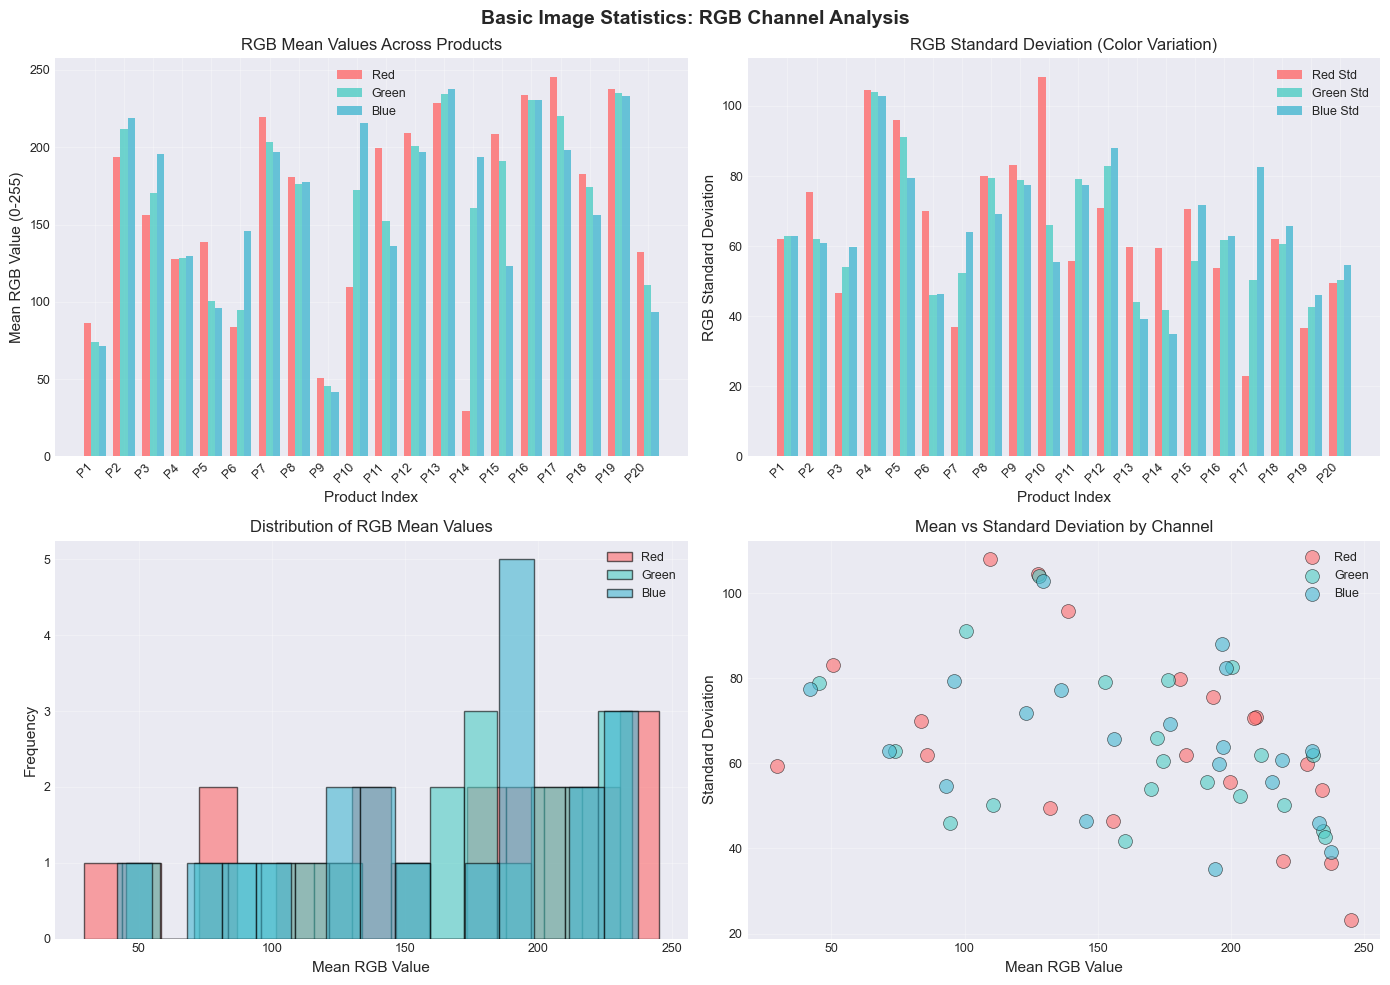


2. Creating Color Feature Charts...


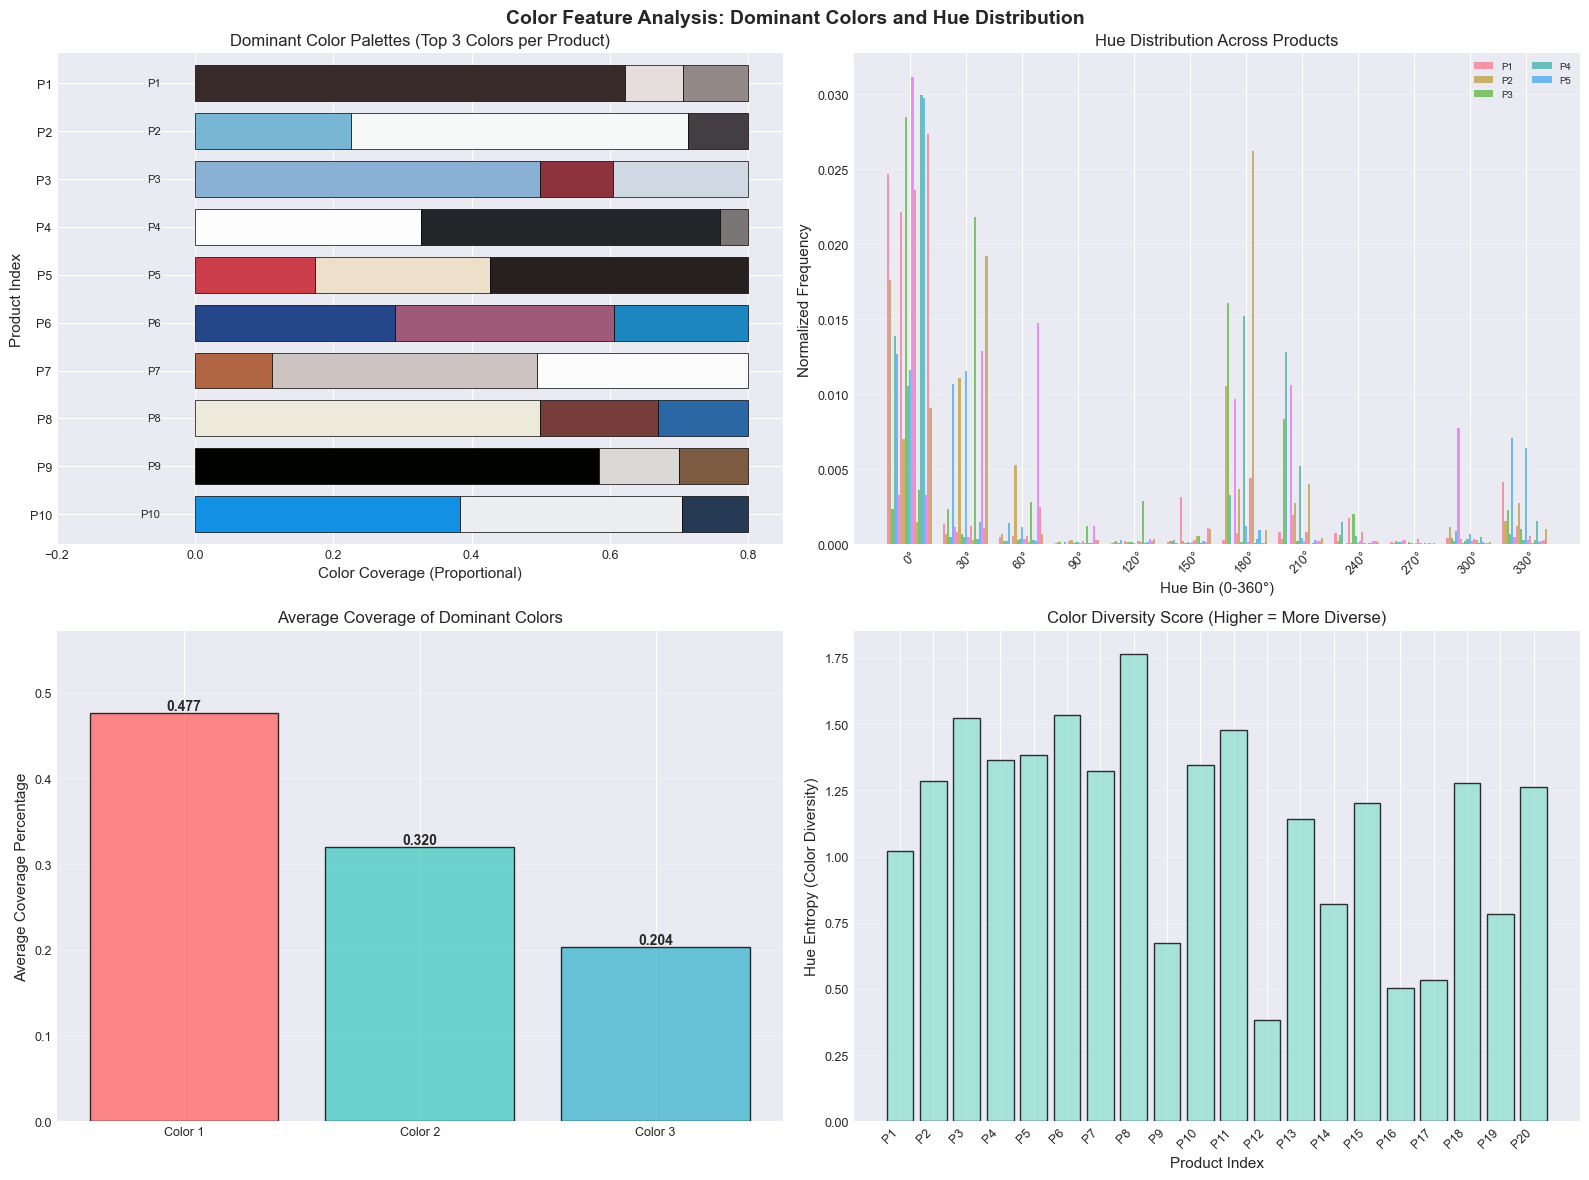


3. Creating Texture & Graphics Feature Charts...


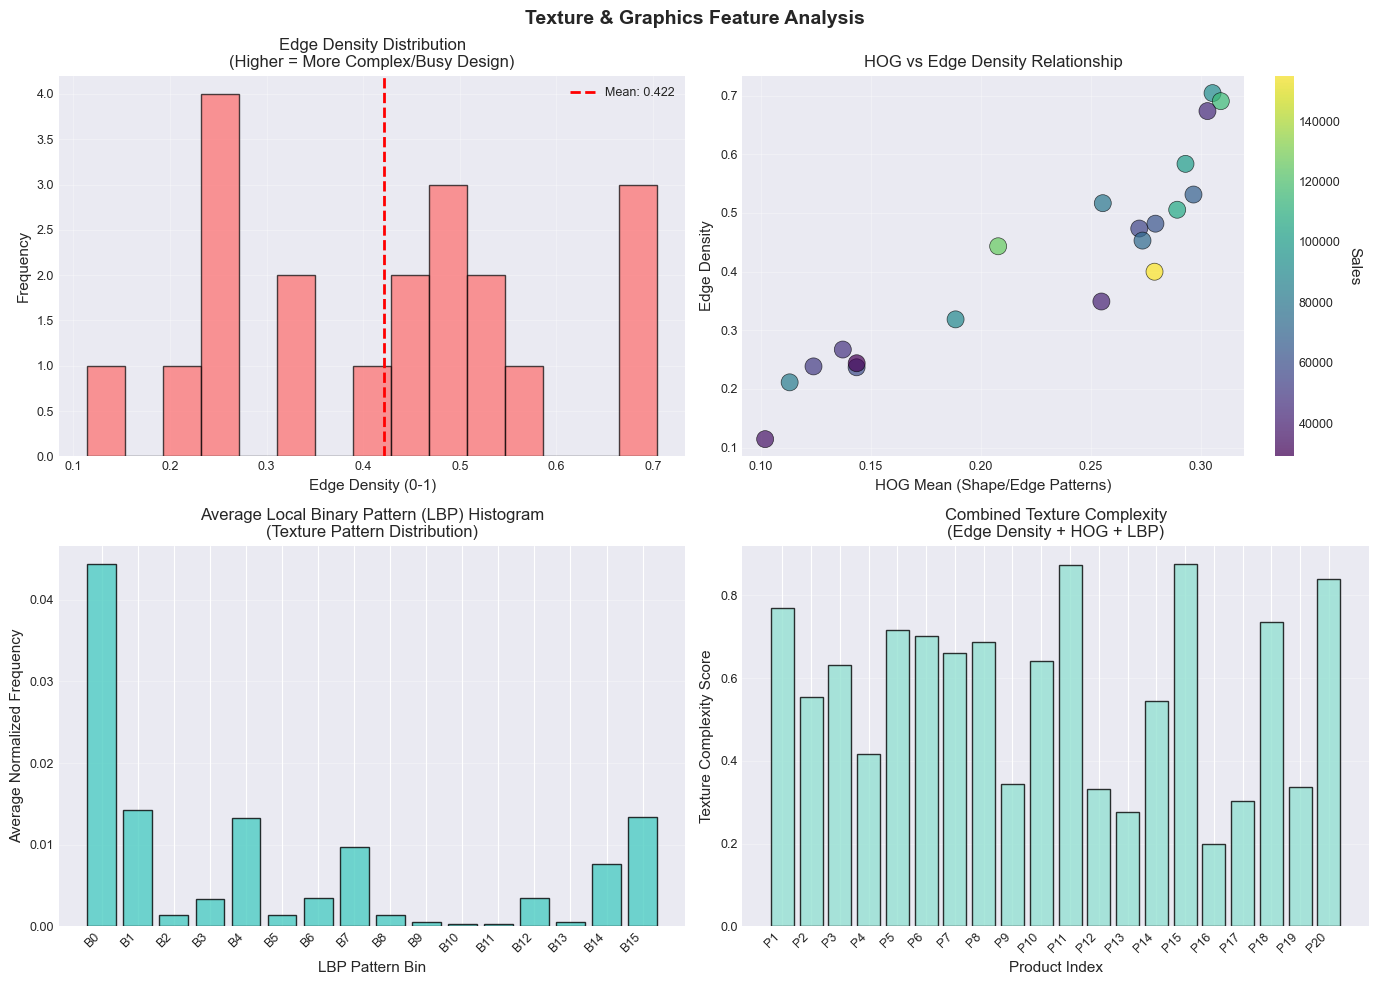


4. Creating Layout & Logo Feature Charts...


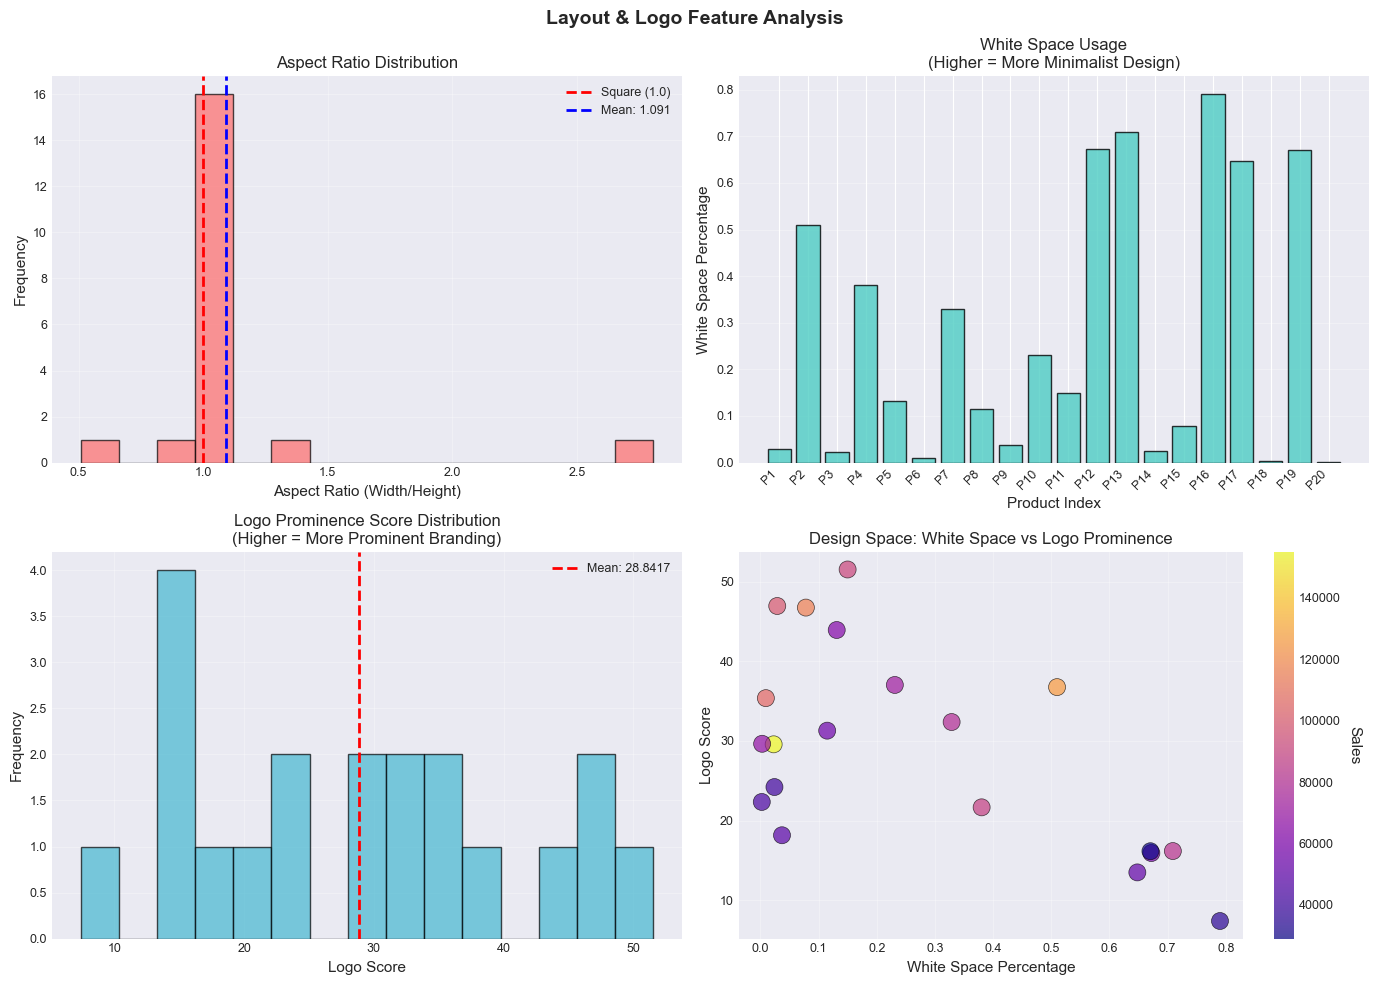


5. Creating Typography Feature Charts...


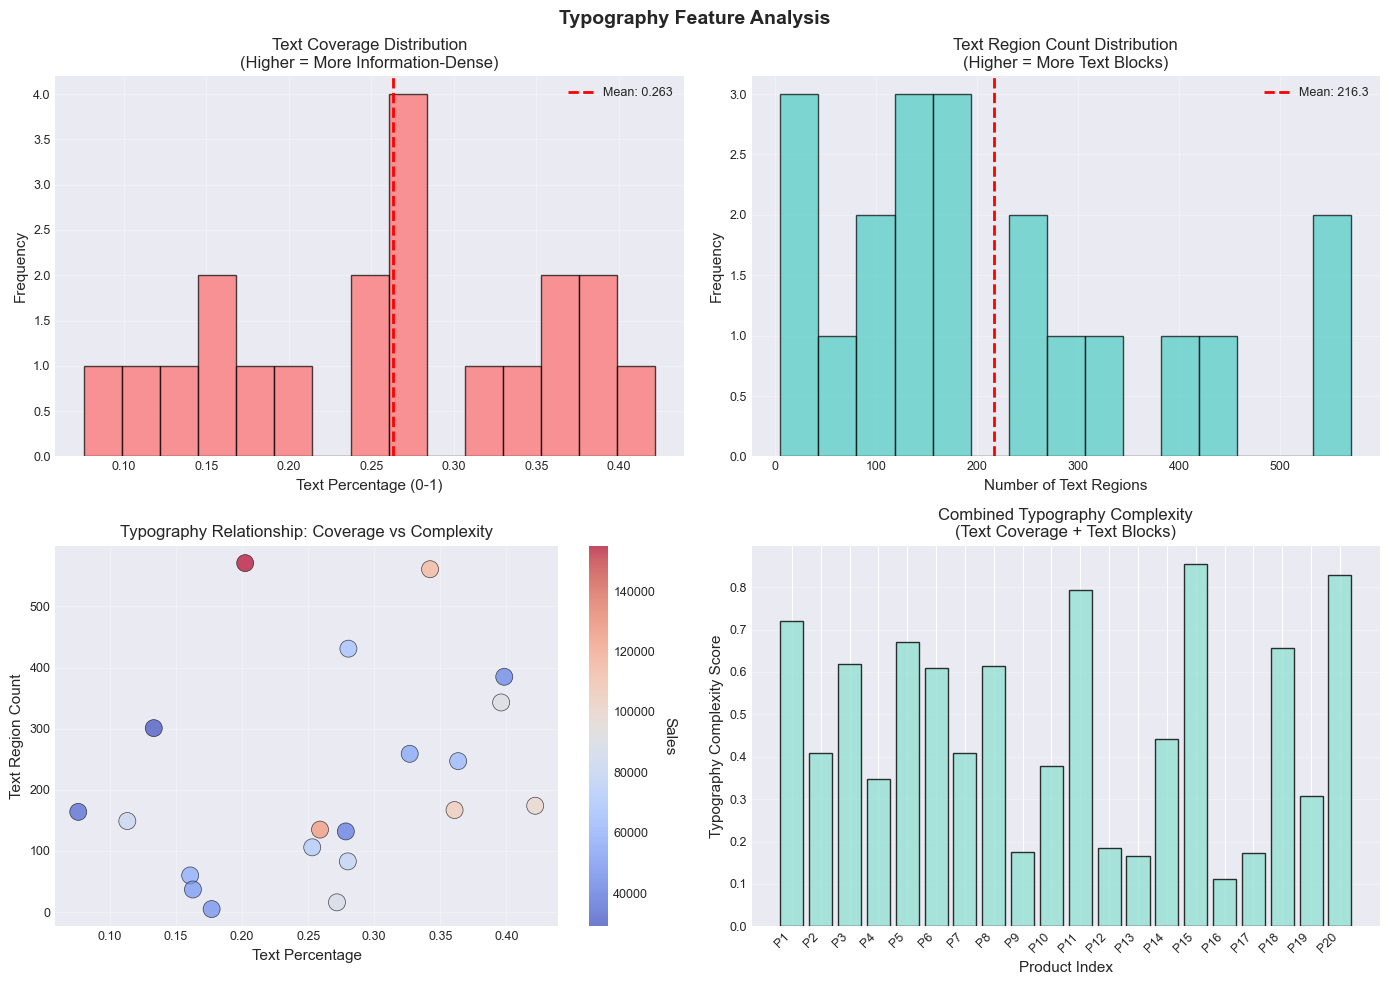


6. Creating Comprehensive Feature Summary...


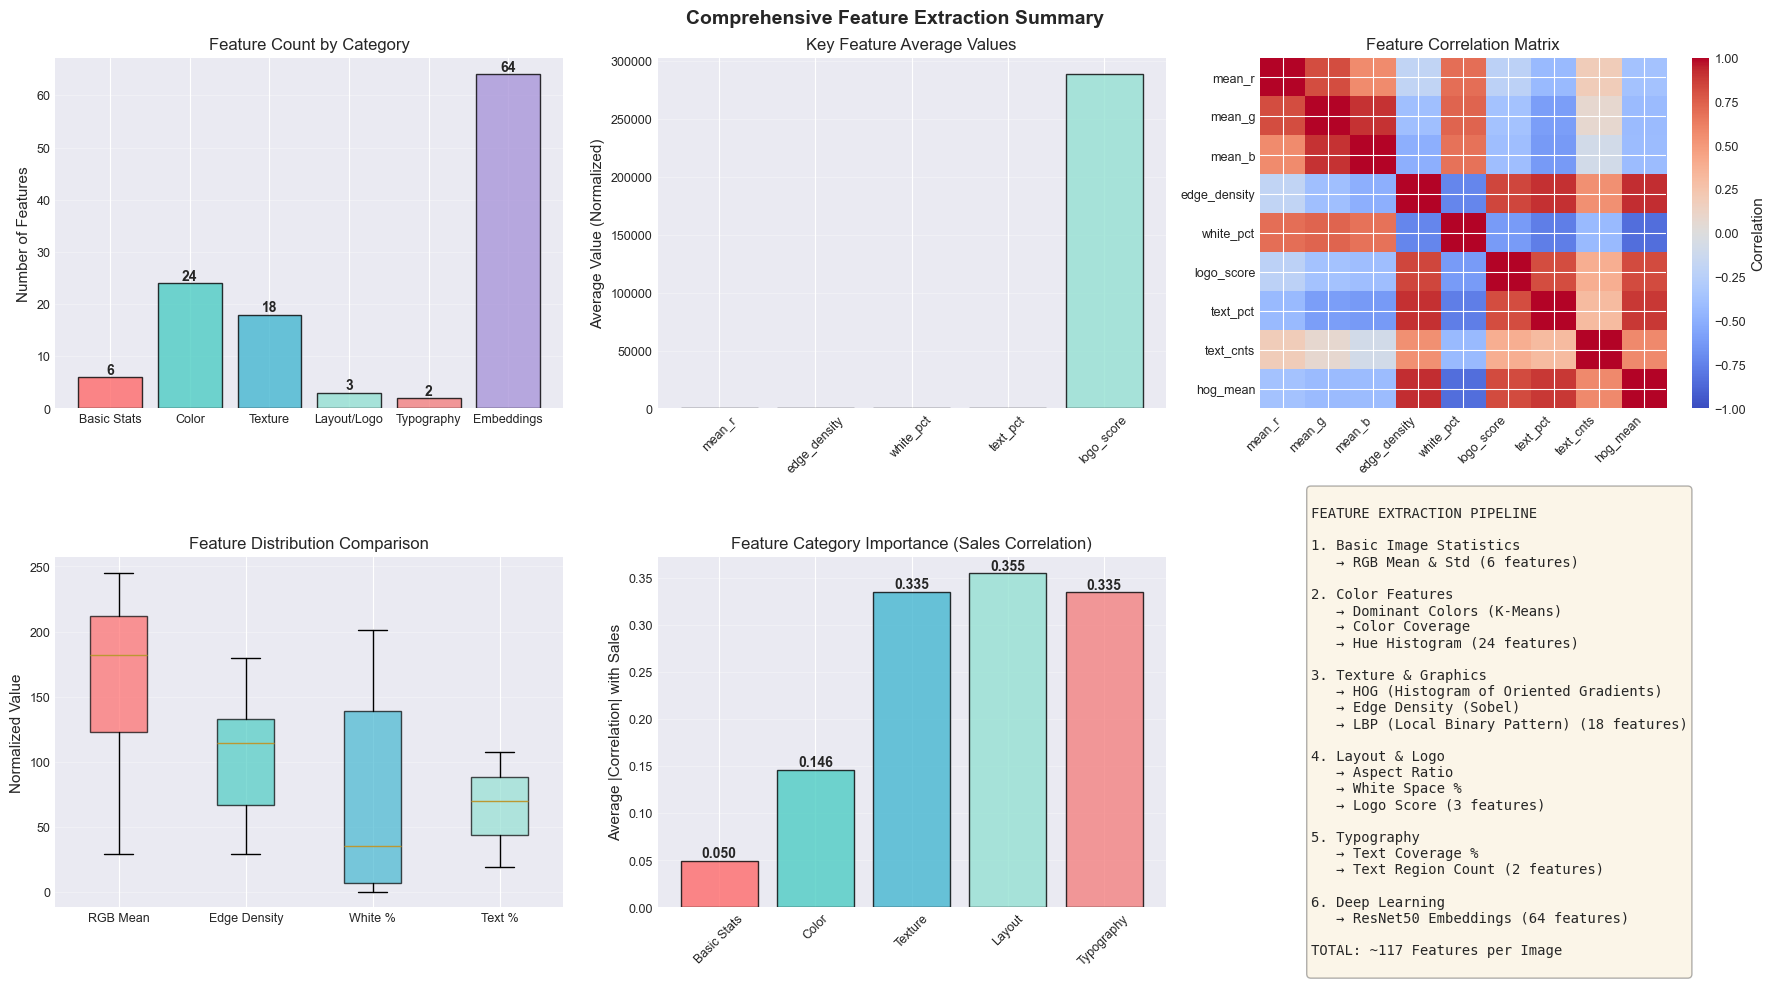


All visualizations saved to: /Users/mohini.gangaram/Desktop/MLPostGrad/Sem3/MainProject/ml_outputs

Generated Charts:
  1. 01_basic_image_statistics.png - RGB channel analysis
  2. 02_color_features.png - Color palette and hue distribution
  3. 03_texture_features.png - Texture and graphics analysis
  4. 04_layout_logo_features.png - Layout and logo analysis
  5. 05_typography_features.png - Typography analysis
  6. 06_comprehensive_summary.png - Overall feature summary


In [2]:
# ============================================================================
# FEATURE EXTRACTION VISUALIZATIONS FOR THESIS
# ============================================================================
# Comprehensive charts for understanding extracted features
# These visualizations help interpret the feature extraction results

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.colors import rgb2hex
import warnings
warnings.filterwarnings('ignore')

# Set style for publication-quality figures
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9

# Ensure we have the full dataframe with features
# This assumes features_df and full have been created in previous cells

print("="*80)
print("FEATURE EXTRACTION VISUALIZATIONS")
print("="*80)

# ============================================================================
# 1. BASIC IMAGE STATISTICS VISUALIZATION
# ============================================================================
print("\n1. Creating Basic Image Statistics Charts...")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Basic Image Statistics: RGB Channel Analysis', fontsize=14, fontweight='bold')

# 1.1 RGB Mean Values Comparison
ax1 = axes[0, 0]
rgb_means = full[['mean_r', 'mean_g', 'mean_b']].values
x_pos = np.arange(len(full))
width = 0.25
ax1.bar(x_pos - width, full['mean_r'], width, label='Red', color='#FF6B6B', alpha=0.8)
ax1.bar(x_pos, full['mean_g'], width, label='Green', color='#4ECDC4', alpha=0.8)
ax1.bar(x_pos + width, full['mean_b'], width, label='Blue', color='#45B7D1', alpha=0.8)
ax1.set_xlabel('Product Index')
ax1.set_ylabel('Mean RGB Value (0-255)')
ax1.set_title('RGB Mean Values Across Products')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([f'P{i+1}' for i in range(len(full))], rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 1.2 RGB Standard Deviation Comparison
ax2 = axes[0, 1]
ax2.bar(x_pos - width, full['std_r'], width, label='Red Std', color='#FF6B6B', alpha=0.8)
ax2.bar(x_pos, full['std_g'], width, label='Green Std', color='#4ECDC4', alpha=0.8)
ax2.bar(x_pos + width, full['std_b'], width, label='Blue Std', color='#45B7D1', alpha=0.8)
ax2.set_xlabel('Product Index')
ax2.set_ylabel('RGB Standard Deviation')
ax2.set_title('RGB Standard Deviation (Color Variation)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels([f'P{i+1}' for i in range(len(full))], rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 1.3 RGB Mean Distribution
ax3 = axes[1, 0]
ax3.hist(full['mean_r'], bins=15, alpha=0.6, label='Red', color='#FF6B6B', edgecolor='black')
ax3.hist(full['mean_g'], bins=15, alpha=0.6, label='Green', color='#4ECDC4', edgecolor='black')
ax3.hist(full['mean_b'], bins=15, alpha=0.6, label='Blue', color='#45B7D1', edgecolor='black')
ax3.set_xlabel('Mean RGB Value')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of RGB Mean Values')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 1.4 RGB Std vs Mean Scatter
ax4 = axes[1, 1]
scatter1 = ax4.scatter(full['mean_r'], full['std_r'], c='#FF6B6B', s=100, alpha=0.6, label='Red', edgecolors='black', linewidth=0.5)
scatter2 = ax4.scatter(full['mean_g'], full['std_g'], c='#4ECDC4', s=100, alpha=0.6, label='Green', edgecolors='black', linewidth=0.5)
scatter3 = ax4.scatter(full['mean_b'], full['std_b'], c='#45B7D1', s=100, alpha=0.6, label='Blue', edgecolors='black', linewidth=0.5)
ax4.set_xlabel('Mean RGB Value')
ax4.set_ylabel('Standard Deviation')
ax4.set_title('Mean vs Standard Deviation by Channel')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / '01_basic_image_statistics.png', bbox_inches='tight', facecolor='white')
plt.show()

# ============================================================================
# 2. COLOR FEATURE VISUALIZATION
# ============================================================================
print("\n2. Creating Color Feature Charts...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Color Feature Analysis: Dominant Colors and Hue Distribution', fontsize=14, fontweight='bold')

# 2.1 Dominant Colors Visualization
ax1 = axes[0, 0]
# Extract dominant colors (first 3 colors, each with RGB values)
n_products = len(full)
colors_per_product = 3
color_swatches = []

for idx in range(min(10, n_products)):  # Show first 10 products
    # Get RGB values for 3 dominant colors
    r1, g1, b1 = full.iloc[idx]['color_feat_0'], full.iloc[idx]['color_feat_1'], full.iloc[idx]['color_feat_2']
    r2, g2, b2 = full.iloc[idx]['color_feat_3'], full.iloc[idx]['color_feat_4'], full.iloc[idx]['color_feat_5']
    r3, g3, b3 = full.iloc[idx]['color_feat_6'], full.iloc[idx]['color_feat_7'], full.iloc[idx]['color_feat_8']
    
    # Get coverage percentages
    pct1 = full.iloc[idx]['color_feat_9']
    pct2 = full.iloc[idx]['color_feat_10']
    pct3 = full.iloc[idx]['color_feat_11']
    
    # Normalize RGB to 0-1
    colors = [
        (r1/255, g1/255, b1/255),
        (r2/255, g2/255, b2/255),
        (r3/255, g3/255, b3/255)
    ]
    
    y_pos = idx * 0.8
    x_start = 0
    for i, (color, pct) in enumerate(zip(colors, [pct1, pct2, pct3])):
        width = pct * 0.8
        rect = Rectangle((x_start, y_pos), width, 0.6, facecolor=color, edgecolor='black', linewidth=0.5)
        ax1.add_patch(rect)
        x_start += width
    
    ax1.text(-0.05, y_pos + 0.3, f'P{idx+1}', ha='right', va='center', fontsize=8)

ax1.set_xlim(-0.2, 0.85)
ax1.set_ylim(-0.2, min(10, n_products) * 0.8)
ax1.set_xlabel('Color Coverage (Proportional)')
ax1.set_ylabel('Product Index')
ax1.set_title('Dominant Color Palettes (Top 3 Colors per Product)')
ax1.set_yticks([i*0.8 + 0.3 for i in range(min(10, n_products))])
ax1.set_yticklabels([f'P{i+1}' for i in range(min(10, n_products))])
ax1.invert_yaxis()

# 2.2 Hue Histogram Comparison
ax2 = axes[0, 1]
hue_bins = 12
hue_data = np.array([full[f'color_feat_{i+12}'].values for i in range(hue_bins)])
x_pos_hue = np.arange(hue_bins)
width_hue = 0.8 / n_products

for idx in range(n_products):
    offset = (idx - n_products/2) * width_hue
    ax2.bar(x_pos_hue + offset, hue_data[:, idx], width_hue, alpha=0.7, 
            label=f'P{idx+1}' if idx < 5 else '')

ax2.set_xlabel('Hue Bin (0-360°)')
ax2.set_ylabel('Normalized Frequency')
ax2.set_title('Hue Distribution Across Products')
ax2.set_xticks(x_pos_hue)
ax2.set_xticklabels([f'{i*30}°' for i in range(hue_bins)], rotation=45)
ax2.legend(ncol=2, fontsize=7)
ax2.grid(True, alpha=0.3, axis='y')

# 2.3 Average Dominant Color Coverage
ax3 = axes[1, 0]
coverage_data = [full['color_feat_9'].mean(), full['color_feat_10'].mean(), full['color_feat_11'].mean()]
colors_avg = ['#FF6B6B', '#4ECDC4', '#45B7D1']
bars = ax3.bar(['Color 1', 'Color 2', 'Color 3'], coverage_data, color=colors_avg, alpha=0.8, edgecolor='black')
ax3.set_ylabel('Average Coverage Percentage')
ax3.set_title('Average Coverage of Dominant Colors')
ax3.set_ylim(0, max(coverage_data) * 1.2)
ax3.grid(True, alpha=0.3, axis='y')
# Add value labels on bars
for bar, val in zip(bars, coverage_data):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:.3f}', ha='center', va='bottom', fontweight='bold')

# 2.4 Color Diversity (Hue Histogram Entropy)
ax4 = axes[1, 1]
from scipy.stats import entropy

hue_entropies = []
for idx in range(n_products):
    hue_hist = [full.iloc[idx][f'color_feat_{i+12}'] for i in range(hue_bins)]
    # Normalize to probability distribution
    hue_hist = np.array(hue_hist)
    hue_hist = hue_hist / hue_hist.sum() if hue_hist.sum() > 0 else hue_hist
    ent = entropy(hue_hist + 1e-10)  # Add small value to avoid log(0)
    hue_entropies.append(ent)

ax4.bar(range(n_products), hue_entropies, color='#95E1D3', alpha=0.8, edgecolor='black')
ax4.set_xlabel('Product Index')
ax4.set_ylabel('Hue Entropy (Color Diversity)')
ax4.set_title('Color Diversity Score (Higher = More Diverse)')
ax4.set_xticks(range(n_products))
ax4.set_xticklabels([f'P{i+1}' for i in range(n_products)], rotation=45, ha='right')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / '02_color_features.png', bbox_inches='tight', facecolor='white')
plt.show()

# ============================================================================
# 3. TEXTURE & GRAPHICS FEATURE VISUALIZATION
# ============================================================================
print("\n3. Creating Texture & Graphics Feature Charts...")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Texture & Graphics Feature Analysis', fontsize=14, fontweight='bold')

# 3.1 Edge Density Distribution
ax1 = axes[0, 0]
ax1.hist(full['edge_density'], bins=15, color='#FF6B6B', alpha=0.7, edgecolor='black')
ax1.axvline(full['edge_density'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {full["edge_density"].mean():.3f}')
ax1.set_xlabel('Edge Density (0-1)')
ax1.set_ylabel('Frequency')
ax1.set_title('Edge Density Distribution\n(Higher = More Complex/Busy Design)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 3.2 HOG Mean vs Edge Density
ax2 = axes[0, 1]
scatter = ax2.scatter(full['hog_mean'], full['edge_density'], 
                     c=full['Sale'] if 'Sale' in full.columns else range(len(full)),
                     s=150, alpha=0.7, cmap='viridis', edgecolors='black', linewidth=0.5)
ax2.set_xlabel('HOG Mean (Shape/Edge Patterns)')
ax2.set_ylabel('Edge Density')
ax2.set_title('HOG vs Edge Density Relationship')
if 'Sale' in full.columns:
    cbar = plt.colorbar(scatter, ax=ax2)
    cbar.set_label('Sales', rotation=270, labelpad=15)
ax2.grid(True, alpha=0.3)

# 3.3 LBP Histogram (Average across all products)
ax3 = axes[1, 0]
lbp_cols = [f'lbp_{i}' for i in range(16)]
lbp_avg = [full[col].mean() for col in lbp_cols]
bars = ax3.bar(range(16), lbp_avg, color='#4ECDC4', alpha=0.8, edgecolor='black')
ax3.set_xlabel('LBP Pattern Bin')
ax3.set_ylabel('Average Normalized Frequency')
ax3.set_title('Average Local Binary Pattern (LBP) Histogram\n(Texture Pattern Distribution)')
ax3.set_xticks(range(16))
ax3.set_xticklabels([f'B{i}' for i in range(16)], rotation=45, ha='right')
ax3.grid(True, alpha=0.3, axis='y')

# 3.4 Texture Complexity Score (Combined)
ax4 = axes[1, 1]
# Create a combined texture complexity score
texture_complexity = (full['edge_density'] * 0.4 + 
                     (full['hog_mean'] / full['hog_mean'].max()) * 0.3 +
                     (full[[f'lbp_{i}' for i in range(16)]].sum(axis=1) / 
                      full[[f'lbp_{i}' for i in range(16)]].sum(axis=1).max()) * 0.3)

ax4.bar(range(n_products), texture_complexity, color='#95E1D3', alpha=0.8, edgecolor='black')
ax4.set_xlabel('Product Index')
ax4.set_ylabel('Texture Complexity Score')
ax4.set_title('Combined Texture Complexity\n(Edge Density + HOG + LBP)')
ax4.set_xticks(range(n_products))
ax4.set_xticklabels([f'P{i+1}' for i in range(n_products)], rotation=45, ha='right')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / '03_texture_features.png', bbox_inches='tight', facecolor='white')
plt.show()

# ============================================================================
# 4. LAYOUT & LOGO FEATURE VISUALIZATION
# ============================================================================
print("\n4. Creating Layout & Logo Feature Charts...")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Layout & Logo Feature Analysis', fontsize=14, fontweight='bold')

# 4.1 Aspect Ratio Distribution
ax1 = axes[0, 0]
ax1.hist(full['aspect_ratio'], bins=15, color='#FF6B6B', alpha=0.7, edgecolor='black')
ax1.axvline(1.0, color='red', linestyle='--', linewidth=2, label='Square (1.0)')
ax1.axvline(full['aspect_ratio'].mean(), color='blue', linestyle='--', linewidth=2, 
           label=f'Mean: {full["aspect_ratio"].mean():.3f}')
ax1.set_xlabel('Aspect Ratio (Width/Height)')
ax1.set_ylabel('Frequency')
ax1.set_title('Aspect Ratio Distribution')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 4.2 White Space Percentage
ax2 = axes[0, 1]
ax2.bar(range(n_products), full['white_pct'], color='#4ECDC4', alpha=0.8, edgecolor='black')
ax2.set_xlabel('Product Index')
ax2.set_ylabel('White Space Percentage')
ax2.set_title('White Space Usage\n(Higher = More Minimalist Design)')
ax2.set_xticks(range(n_products))
ax2.set_xticklabels([f'P{i+1}' for i in range(n_products)], rotation=45, ha='right')
ax2.grid(True, alpha=0.3, axis='y')

# 4.3 Logo Score Distribution
ax3 = axes[1, 0]
ax3.hist(full['logo_score'], bins=15, color='#45B7D1', alpha=0.7, edgecolor='black')
ax3.axvline(full['logo_score'].mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {full["logo_score"].mean():.4f}')
ax3.set_xlabel('Logo Score')
ax3.set_ylabel('Frequency')
ax3.set_title('Logo Prominence Score Distribution\n(Higher = More Prominent Branding)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4.4 Layout Design Space (White Space vs Logo Score)
ax4 = axes[1, 1]
scatter = ax4.scatter(full['white_pct'], full['logo_score'],
                     c=full['Sale'] if 'Sale' in full.columns else range(len(full)),
                     s=150, alpha=0.7, cmap='plasma', edgecolors='black', linewidth=0.5)
ax4.set_xlabel('White Space Percentage')
ax4.set_ylabel('Logo Score')
ax4.set_title('Design Space: White Space vs Logo Prominence')
if 'Sale' in full.columns:
    cbar = plt.colorbar(scatter, ax=ax4)
    cbar.set_label('Sales', rotation=270, labelpad=15)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / '04_layout_logo_features.png', bbox_inches='tight', facecolor='white')
plt.show()

# ============================================================================
# 5. TYPOGRAPHY FEATURE VISUALIZATION
# ============================================================================
print("\n5. Creating Typography Feature Charts...")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Typography Feature Analysis', fontsize=14, fontweight='bold')

# 5.1 Text Percentage Distribution
ax1 = axes[0, 0]
ax1.hist(full['text_pct'], bins=15, color='#FF6B6B', alpha=0.7, edgecolor='black')
ax1.axvline(full['text_pct'].mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {full["text_pct"].mean():.3f}')
ax1.set_xlabel('Text Percentage (0-1)')
ax1.set_ylabel('Frequency')
ax1.set_title('Text Coverage Distribution\n(Higher = More Information-Dense)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 5.2 Text Count Distribution
ax2 = axes[0, 1]
ax2.hist(full['text_cnts'], bins=15, color='#4ECDC4', alpha=0.7, edgecolor='black')
ax2.axvline(full['text_cnts'].mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {full["text_cnts"].mean():.1f}')
ax2.set_xlabel('Number of Text Regions')
ax2.set_ylabel('Frequency')
ax2.set_title('Text Region Count Distribution\n(Higher = More Text Blocks)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 5.3 Text Percentage vs Text Count
ax3 = axes[1, 0]
scatter = ax3.scatter(full['text_pct'], full['text_cnts'],
                     c=full['Sale'] if 'Sale' in full.columns else range(len(full)),
                     s=150, alpha=0.7, cmap='coolwarm', edgecolors='black', linewidth=0.5)
ax3.set_xlabel('Text Percentage')
ax3.set_ylabel('Text Region Count')
ax3.set_title('Typography Relationship: Coverage vs Complexity')
if 'Sale' in full.columns:
    cbar = plt.colorbar(scatter, ax=ax3)
    cbar.set_label('Sales', rotation=270, labelpad=15)
ax3.grid(True, alpha=0.3)

# 5.4 Typography Complexity Score (Combined)
ax4 = axes[1, 1]
# Normalize and combine text features
text_pct_norm = (full['text_pct'] - full['text_pct'].min()) / (full['text_pct'].max() - full['text_pct'].min() + 1e-10)
text_cnts_norm = (full['text_cnts'] - full['text_cnts'].min()) / (full['text_cnts'].max() - full['text_cnts'].min() + 1e-10)
typography_complexity = (text_pct_norm * 0.6 + text_cnts_norm * 0.4)

ax4.bar(range(n_products), typography_complexity, color='#95E1D3', alpha=0.8, edgecolor='black')
ax4.set_xlabel('Product Index')
ax4.set_ylabel('Typography Complexity Score')
ax4.set_title('Combined Typography Complexity\n(Text Coverage + Text Blocks)')
ax4.set_xticks(range(n_products))
ax4.set_xticklabels([f'P{i+1}' for i in range(n_products)], rotation=45, ha='right')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / '05_typography_features.png', bbox_inches='tight', facecolor='white')
plt.show()

# ============================================================================
# 6. COMPREHENSIVE FEATURE SUMMARY
# ============================================================================
print("\n6. Creating Comprehensive Feature Summary...")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Comprehensive Feature Extraction Summary', fontsize=14, fontweight='bold')

# 6.1 Feature Categories Overview
ax1 = axes[0, 0]
feature_categories = {
    'Basic Stats': 6,  # mean_r, mean_g, mean_b, std_r, std_g, std_b
    'Color': 24,       # color_feat_0 to color_feat_23
    'Texture': 18,     # hog_mean, edge_density, lbp_0 to lbp_15
    'Layout/Logo': 3,  # aspect_ratio, white_pct, logo_score
    'Typography': 2,  # text_pct, text_cnts
    'Embeddings': 64   # emb_0 to emb_63
}
colors_cat = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#95E1D3', '#F38181', '#AA96DA']
bars = ax1.bar(feature_categories.keys(), feature_categories.values(), 
               color=colors_cat[:len(feature_categories)], alpha=0.8, edgecolor='black')
ax1.set_ylabel('Number of Features')
ax1.set_title('Feature Count by Category')
ax1.grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars, feature_categories.values()):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{val}', ha='center', va='bottom', fontweight='bold')

# 6.2 Feature Value Ranges (Normalized)
ax2 = axes[0, 1]
# Sample key features to show ranges
key_features = {
    'mean_r': full['mean_r'].mean(),
    'edge_density': full['edge_density'].mean() * 255,  # Scale for comparison
    'white_pct': full['white_pct'].mean() * 255,
    'text_pct': full['text_pct'].mean() * 255,
    'logo_score': full['logo_score'].mean() * 10000  # Scale for visibility
}
bars = ax2.bar(key_features.keys(), key_features.values(), 
               color='#95E1D3', alpha=0.8, edgecolor='black')
ax2.set_ylabel('Average Value (Normalized)')
ax2.set_title('Key Feature Average Values')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# 6.3 Feature Correlation Heatmap (Sample)
ax3 = axes[0, 2]
sample_features = ['mean_r', 'mean_g', 'mean_b', 'edge_density', 'white_pct', 
                   'logo_score', 'text_pct', 'text_cnts', 'hog_mean']
corr_data = full[sample_features].corr()
im = ax3.imshow(corr_data, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
ax3.set_xticks(range(len(sample_features)))
ax3.set_yticks(range(len(sample_features)))
ax3.set_xticklabels(sample_features, rotation=45, ha='right')
ax3.set_yticklabels(sample_features)
ax3.set_title('Feature Correlation Matrix')
plt.colorbar(im, ax=ax3, label='Correlation')

# 6.4 Feature Distribution Comparison (Box Plot)
ax4 = axes[1, 0]
sample_data = [full['mean_r'], full['edge_density']*255, full['white_pct']*255, 
               full['text_pct']*255]
bp = ax4.boxplot(sample_data, labels=['RGB Mean', 'Edge Density', 'White %', 'Text %'],
                 patch_artist=True)
for patch, color in zip(bp['boxes'], ['#FF6B6B', '#4ECDC4', '#45B7D1', '#95E1D3']):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax4.set_ylabel('Normalized Value')
ax4.set_title('Feature Distribution Comparison')
ax4.grid(True, alpha=0.3, axis='y')

# 6.5 Feature Importance by Category (if Sale column exists)
ax5 = axes[1, 1]
if 'Sale' in full.columns:
    # Calculate correlation with sales for each category
    category_corrs = {
        'Basic Stats': abs(full[['mean_r', 'mean_g', 'mean_b']].corrwith(full['Sale'])).mean(),
        'Color': abs(full[[f'color_feat_{i}' for i in range(24)]].corrwith(full['Sale'])).mean(),
        'Texture': abs(full[['edge_density', 'hog_mean'] + [f'lbp_{i}' for i in range(16)]].corrwith(full['Sale'])).mean(),
        'Layout': abs(full[['aspect_ratio', 'white_pct', 'logo_score']].corrwith(full['Sale'])).mean(),
        'Typography': abs(full[['text_pct', 'text_cnts']].corrwith(full['Sale'])).mean()
    }
    bars = ax5.bar(category_corrs.keys(), category_corrs.values(), 
                   color=colors_cat[:len(category_corrs)], alpha=0.8, edgecolor='black')
    ax5.set_ylabel('Average |Correlation| with Sales')
    ax5.set_title('Feature Category Importance (Sales Correlation)')
    ax5.tick_params(axis='x', rotation=45)
    ax5.grid(True, alpha=0.3, axis='y')
    for bar, val in zip(bars, category_corrs.values()):
        height = bar.get_height()
        ax5.text(bar.get_x() + bar.get_width()/2., height,
                 f'{val:.3f}', ha='center', va='bottom', fontweight='bold')
else:
    ax5.text(0.5, 0.5, 'Sales data not available\nfor correlation analysis', 
            ha='center', va='center', transform=ax5.transAxes, fontsize=12)
    ax5.set_title('Feature Category Importance')

# 6.6 Feature Extraction Pipeline Summary
ax6 = axes[1, 2]
ax6.axis('off')
pipeline_text = """
FEATURE EXTRACTION PIPELINE

1. Basic Image Statistics
   → RGB Mean & Std (6 features)

2. Color Features
   → Dominant Colors (K-Means)
   → Color Coverage
   → Hue Histogram (24 features)

3. Texture & Graphics
   → HOG (Histogram of Oriented Gradients)
   → Edge Density (Sobel)
   → LBP (Local Binary Pattern) (18 features)

4. Layout & Logo
   → Aspect Ratio
   → White Space %
   → Logo Score (3 features)

5. Typography
   → Text Coverage %
   → Text Region Count (2 features)

6. Deep Learning
   → ResNet50 Embeddings (64 features)

TOTAL: ~117 Features per Image
"""
ax6.text(0.1, 0.5, pipeline_text, transform=ax6.transAxes,
         fontsize=10, verticalalignment='center', family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.savefig(OUTPUT_DIR / '06_comprehensive_summary.png', bbox_inches='tight', facecolor='white')
plt.show()

print("\n" + "="*80)
print("All visualizations saved to:", OUTPUT_DIR)
print("="*80)
print("\nGenerated Charts:")
print("  1. 01_basic_image_statistics.png - RGB channel analysis")
print("  2. 02_color_features.png - Color palette and hue distribution")
print("  3. 03_texture_features.png - Texture and graphics analysis")
print("  4. 04_layout_logo_features.png - Layout and logo analysis")
print("  5. 05_typography_features.png - Typography analysis")
print("  6. 06_comprehensive_summary.png - Overall feature summary")
print("="*80)



Found 20 image files in /Users/mohini.gangaram/Desktop/MLPostGrad/Sem3/MainProject/ProteinProductImages, sample: ['1.jpeg', '2.jpeg', '3.jpeg', '4.jpeg', '5.jpeg', '6.jpeg']
Excel shape: (20, 6)


,Product Name,Price,Product Label Image Description,Rate (out of 5),Sale,Age of Customer (Mode)
0,Core Power Elite Shake (Chocolate),3.99,Black bottle with a gold lightning bolt graphi...,4.6,98500,28
1,Quest Protein Bar (Cookies & Cream),2.59,White wrapper with blue text and a picture of ...,4.4,125000,25
2,Premier Protein Shake (Vanilla),3.49,Silver carton with green and purple swooshes.,4.7,155000,45
3,RXBAR (Chocolate Sea Salt),2.79,Minimalist brown wrapper listing 3-4 key ingre...,4.5,88000,32
4,Optimum Nutrition Gold Standard Shake (Strawbe...,4.19,"Bright red, glossy bottle with a reflective go...",4.3,62000,22


                                        Product Name  \
0                 Core Power Elite Shake (Chocolate)   
1                Quest Protein Bar (Cookies & Cream)   
2                    Premier Protein Shake (Vanilla)   
3                         RXBAR (Chocolate Sea Salt)   
4  Optimum Nutrition Gold Standard Shake (Strawbe...   

                                          image_path  
0  /Users/mohini.gangaram/Desktop/MLPostGrad/Sem3...  
1  /Users/mohini.gangaram/Desktop/MLPostGrad/Sem3...  
2  /Users/mohini.gangaram/Desktop/MLPostGrad/Sem3...  
3  /Users/mohini.gangaram/Desktop/MLPostGrad/Sem3...  
4  /Users/mohini.gangaram/Desktop/MLPostGrad/Sem3...  


/Users/mohini.gangaram/Desktop/MLPostGrad/Sem3/MainProject/protein_env/lib/python3.12/site-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
/Users/mohini.gangaram/Desktop/MLPostGrad/Sem3/MainProject/protein_env/lib/python3.12/site-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
/Users/mohini.gangaram/Desktop/MLPostGrad/Sem3/MainProject/protein_env/lib/python3.12/site-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected result

Features shape: (20, 117)


/Users/mohini.gangaram/Desktop/MLPostGrad/Sem3/MainProject/protein_env/lib/python3.12/site-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


,mean_r,mean_g,mean_b,std_r,std_g,std_b,aspect_ratio,white_pct,logo_score,text_pct,...,emb_54,emb_55,emb_56,emb_57,emb_58,emb_59,emb_60,emb_61,emb_62,emb_63
idx,,,,,,,,,,,,,,,,,,,,,
0,86.008211,73.725307,71.463469,61.946465,62.957220,62.976154,1.0,0.028838,46.953623,0.421915,...,0.000000,3.778622,0.443917,1.563146,0.115027,0.678156,0.317819,0.021635,0.792973,0.114725
1,193.423763,211.476681,219.164820,75.570712,62.020592,60.870464,1.0,0.509985,36.765333,0.258963,...,1.563238,0.410032,0.298791,0.515423,0.044341,2.239556,0.064146,0.062973,1.234755,1.171671
2,155.850272,170.160553,195.541116,46.518327,54.101203,59.874721,1.0,0.022677,29.582519,0.202311,...,0.092826,0.304367,0.021162,0.119847,0.819771,0.224150,0.490970,0.115980,0.702401,0.048161
3,127.669807,128.105067,129.608869,104.620158,104.073112,102.827231,1.0,0.380306,21.669333,0.271822,...,0.068176,0.075098,0.259336,0.229840,0.237678,1.211277,0.000000,0.000280,0.084675,0.005491
4,138.748721,100.407644,96.146232,95.903069,91.041207,79.471611,1.0,0.131121,43.938074,0.363575,...,0.054013,0.000000,0.075730,0.963319,0.006974,0.123874,0.179953,0.086645,0.212109,0.049943


Full merged shape: (20, 125)


,Product Name,Price,Product Label Image Description,Rate (out of 5),Sale,Age of Customer (Mode),image_path,idx,mean_r,mean_g,...,emb_54,emb_55,emb_56,emb_57,emb_58,emb_59,emb_60,emb_61,emb_62,emb_63
0,Core Power Elite Shake (Chocolate),3.99,Black bottle with a gold lightning bolt graphi...,4.6,98500,28,/Users/mohini.gangaram/Desktop/MLPostGrad/Sem3...,0,86.008211,73.725307,...,0.000000,3.778622,0.443917,1.563146,0.115027,0.678156,0.317819,0.021635,0.792973,0.114725
1,Quest Protein Bar (Cookies & Cream),2.59,White wrapper with blue text and a picture of ...,4.4,125000,25,/Users/mohini.gangaram/Desktop/MLPostGrad/Sem3...,1,193.423763,211.476681,...,1.563238,0.410032,0.298791,0.515423,0.044341,2.239556,0.064146,0.062973,1.234755,1.171671
2,Premier Protein Shake (Vanilla),3.49,Silver carton with green and purple swooshes.,4.7,155000,45,/Users/mohini.gangaram/Desktop/MLPostGrad/Sem3...,2,155.850272,170.160553,...,0.092826,0.304367,0.021162,0.119847,0.819771,0.224150,0.490970,0.115980,0.702401,0.048161
3,RXBAR (Chocolate Sea Salt),2.79,Minimalist brown wrapper listing 3-4 key ingre...,4.5,88000,32,/Users/mohini.gangaram/Desktop/MLPostGrad/Sem3...,3,127.669807,128.105067,...,0.068176,0.075098,0.259336,0.229840,0.237678,1.211277,0.000000,0.000280,0.084675,0.005491
4,Optimum Nutrition Gold Standard Shake (Strawbe...,4.19,"Bright red, glossy bottle with a reflective go...",4.3,62000,22,/Users/mohini.gangaram/Desktop/MLPostGrad/Sem3...,4,138.748721,100.407644,...,0.054013,0.000000,0.075730,0.963319,0.006974,0.123874,0.179953,0.086645,0.212109,0.049943


Sale median threshold: 69500.0


,Sale,HighSale
count,20.000000,20.000000
mean,75025.000000,0.500000
std,32856.336007,0.512989
min,29000.000000,0.000000
25%,50250.000000,0.000000
50%,69500.000000,0.500000
75%,92875.000000,1.000000
max,155000.000000,1.000000


Train/Test sizes: (16, 117) (4, 117)
--- Ridge ---
Train RMSE: 346.0602863280366
Test  RMSE: 52564.06926544673
Test R2: -1.4270276585669799
--- RandomForest ---
Train RMSE: 11380.21762204045
Test  RMSE: 37714.59448940158
Test R2: -0.24944071151127511
--- XGBoost ---
Train RMSE: 0.012927931928587624
Test  RMSE: 49854.580210849235
Test R2: -1.1832671165466309


,feature,coef
53,emb_0,2537.430356
32,color_feat_19,2534.733500
56,emb_3,-2346.957702
106,emb_53,-2189.567070
42,lbp_5,2161.260767
10,text_cnts,2160.325689
18,color_feat_5,-2031.386933
68,emb_15,2019.876496
103,emb_50,-2019.576088
17,color_feat_4,-1986.094381


,feature,rf_importance
74,emb_21,0.191810
65,emb_12,0.074860
25,color_feat_12,0.041924
56,emb_3,0.041583
10,text_cnts,0.033788
20,color_feat_7,0.031312
92,emb_39,0.028380
82,emb_29,0.020960
59,emb_6,0.020725
62,emb_9,0.018045


,feature,perm_mean
74,emb_21,0.124670
62,emb_9,0.048364
42,lbp_5,0.025891
97,emb_44,0.024494
106,emb_53,0.019170
87,emb_34,0.016673
84,emb_31,0.014428
35,color_feat_22,0.013578
33,color_feat_20,0.011339
70,emb_17,0.010234


Computing SHAP values for XGBoost (may take a moment)...


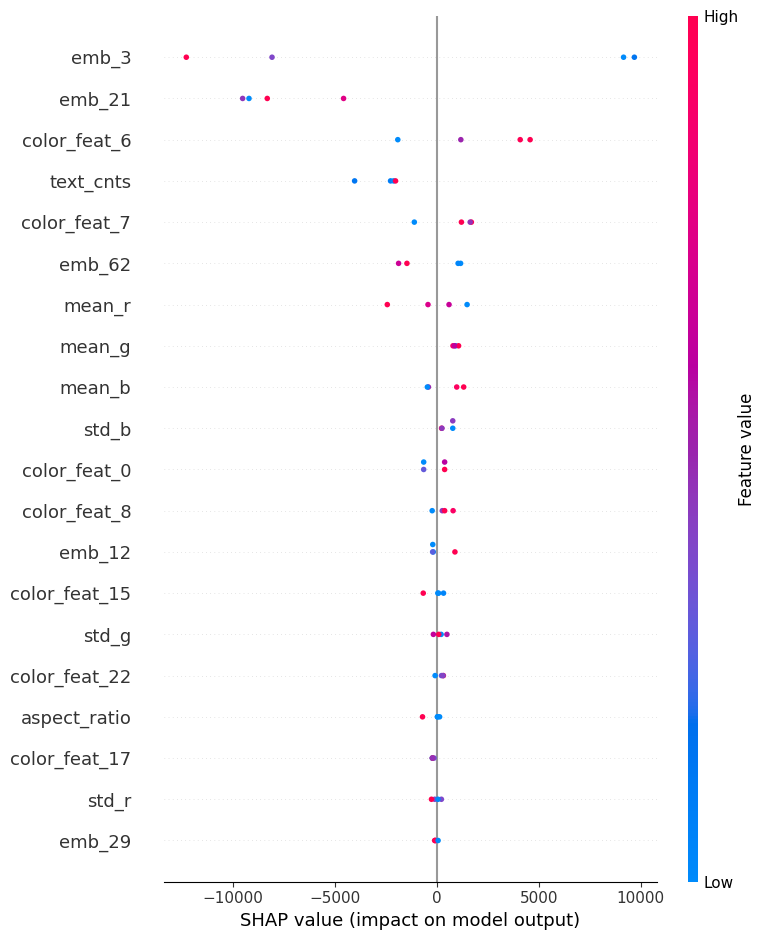

/Users/mohini.gangaram/Desktop/MLPostGrad/Sem3/MainProject/protein_env/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [17:47:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- RF Classifier ---
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



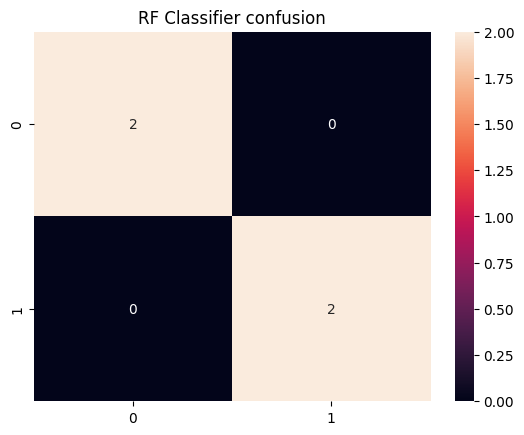

--- XGBoost Classifier ---
Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



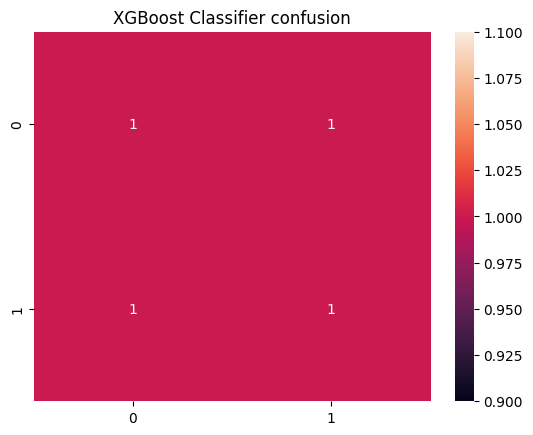

--- Logistic Regression ---
Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



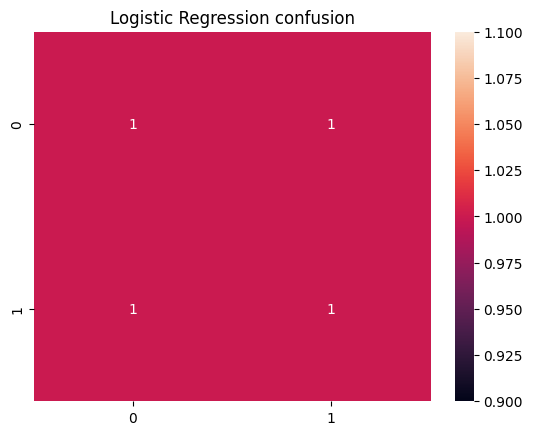

,feature,importance
56,emb_3,0.037449
32,color_feat_19,0.033171
8,logo_score,0.031526
74,emb_21,0.030387
35,color_feat_22,0.030333
42,lbp_5,0.027417
91,emb_38,0.026920
65,emb_12,0.026750
20,color_feat_7,0.025299
21,color_feat_8,0.024969


,feature,perm_mean
97,emb_44,0.2750
32,color_feat_19,0.2625
8,logo_score,0.2625
62,emb_9,0.2625
35,color_feat_22,0.2500
41,lbp_4,0.2000
37,lbp_0,0.1875
42,lbp_5,0.1875
36,color_feat_23,0.1750
26,color_feat_13,0.1750


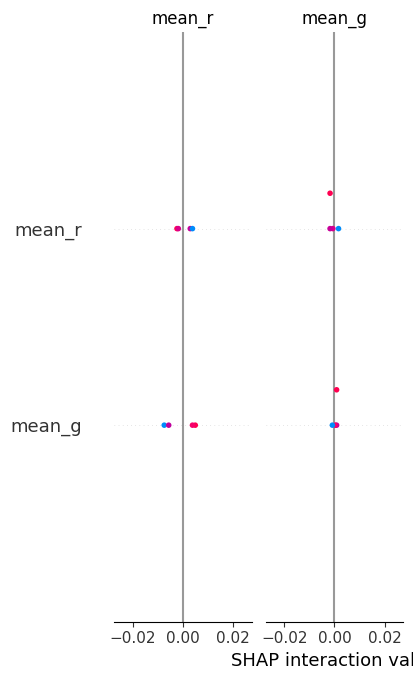

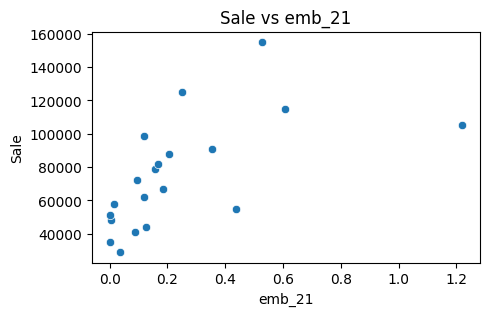

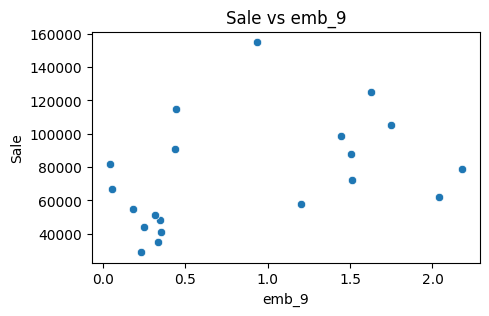

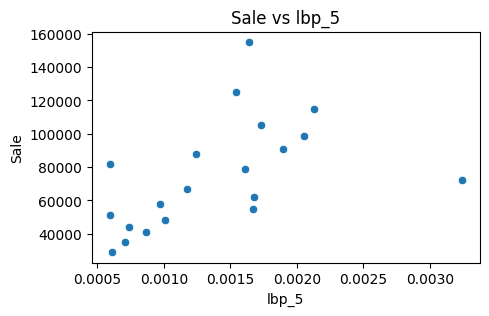

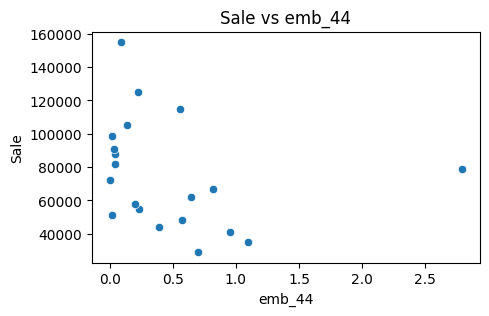

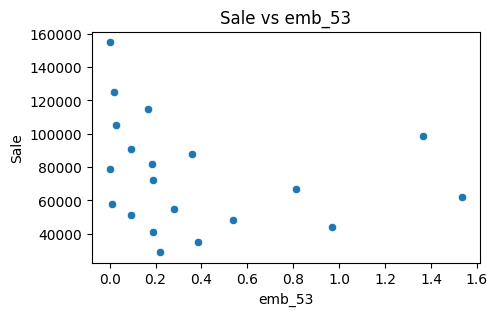

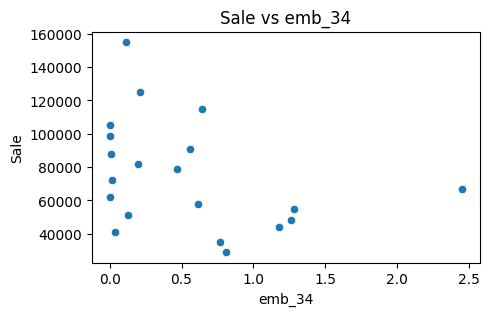

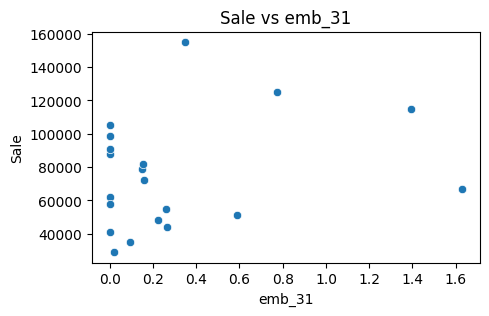

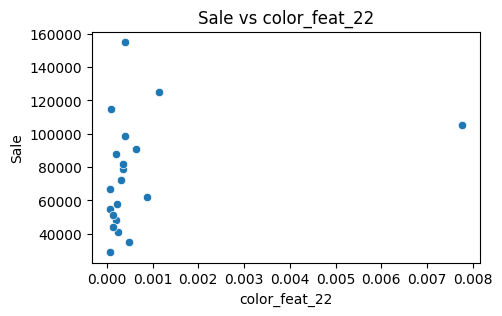

Saving models as .py files...
Saved models as .py files:
  - /Users/mohini.gangaram/Desktop/MLPostGrad/Sem3/MainProject/ml_outputs/rf_reg.py
  - /Users/mohini.gangaram/Desktop/MLPostGrad/Sem3/MainProject/ml_outputs/xgb_reg.py
  - /Users/mohini.gangaram/Desktop/MLPostGrad/Sem3/MainProject/ml_outputs/rf_clf.py
  - /Users/mohini.gangaram/Desktop/MLPostGrad/Sem3/MainProject/ml_outputs/scaler.py
Saved feature table: /Users/mohini.gangaram/Desktop/MLPostGrad/Sem3/MainProject/ml_outputs/feature_table_with_metadata.csv


In [1]:



### 2. Load and Inspect Data
PROJECT_DIR = Path("/Users/mohini.gangaram/Desktop/MLPostGrad/Sem3/MainProject")
excel_path = PROJECT_DIR / "ProteinProducts.xlsx"
images_dir = PROJECT_DIR / "ProteinProductImages"
OUTPUT_DIR = PROJECT_DIR / "ml_outputs"
OUTPUT_DIR.mkdir(exist_ok=True)

RANDOM_STATE = 42
TEST_SIZE = 0.2
CV_FOLDS = 3
PCA_MAX_COMPONENTS = 8



# List images and sort to ensure ordering (1→row1, 2→row2 ...)
# Sorting strategy: natural sort on filenames; if filenames are numbers or prefixed, adjust accordingly.
def natural_key(s):
    import re
    return [int(text) if text.isdigit() else text.lower() for text in re.split('([0-9]+)', s)]
img_files = sorted([f for f in os.listdir(images_dir) if f.lower().endswith(('.png','.jpg','.jpeg'))], key=natural_key)
print(f"Found {len(img_files)} image files in {images_dir}, sample:", img_files[:6])


# ============================================================================
# SECTION 3: IMAGE LOADING FUNCTION
# ============================================================================
#
# PURPOSE:
#   - Create a reusable function to load images from file paths
#   - Convert images to numpy arrays for processing
#   - Handle different image formats consistently
#
# WHAT WE'RE DOING:
#   - Define load_image() function that:
#     1. Opens image file using PIL
#     2. Converts to RGB (handles grayscale, RGBA, etc.)
#     3. Optionally resizes to target_size
#     4. Returns as numpy array (H x W x 3, values 0-255)
#
# EXPECTED RESULT:
#   - Function ready to use for loading images
#   - No output (just function definition)
#
# ============================================================================
df = pd.read_excel(excel_path, sheet_name=0)
df = df.copy()
print("Excel shape:", df.shape)
display(df.head())

# Ensure counts match (images ↔ rows)
if len(img_files) != len(df):
    print("WARNING: number of images != number of rows. Mapping will use the first N images to the first N rows.")
n = min(len(img_files), len(df))
df = df.iloc[:n].reset_index(drop=True)

# Add image path column (1→first row, 2→second row...)
df['image_path'] = [os.path.join(images_dir, f) for f in img_files[:len(df)]]
print(df[['Product Name','image_path']].head())



# ============================================================================
# SECTION 4: BASIC IMAGE STATISTICS EXTRACTION
# ============================================================================
#
# PURPOSE:
#   - Extract fundamental color statistics from images
#   - These are simple but informative features about overall image appearance
#
# WHAT WE'RE DOING:
#   - Define image_stats() function that calculates:
#     1. Mean RGB values (average color per channel)
#     2. Standard deviation RGB values (color variation/contrast)
#
# FEATURES EXTRACTED:
#   - mean_r, mean_g, mean_b: Average red, green, blue intensity (0-255)
#   - std_r, std_g, std_b: Color variation (higher = more contrast)
#
# INTERPRETATION:
#   - High mean values = bright image
#   - Low std values = uniform/flat colors
#   - High std values = high contrast/variety of colors
#
# EXPECTED RESULT:
#   - Function returns 2 arrays: (mean, std) each with 3 values (R, G, B)
#
# ============================================================================
def load_image(path, target_size=None):
    img = Image.open(path).convert('RGB')
    if target_size:
        img = img.resize(target_size, Image.BICUBIC)
    return np.array(img)

def image_stats(img_arr):
    # img_arr: numpy array HxWx3 (0-255)
    img = Image.fromarray(img_arr.astype('uint8'))
    stat = ImageStat.Stat(img)
    mean = stat.mean  # per channel
    std = stat.stddev
    return mean, std

# ============================================================================
# SECTION 5: COLOR FEATURE EXTRACTION
# ============================================================================
#
# PURPOSE:
#   - Identify dominant colors in product images
#   - Understand color palette and distribution
#   - Extract color histogram information
#
# WHAT WE'RE DOING:
#   - Define color_features() function that:
#     1. Uses K-Means clustering to find k dominant colors (default k=3)
#     2. Calculates percentage of image covered by each dominant color
#     3. Creates hue histogram (12 bins) to capture color distribution
#
# FEATURES EXTRACTED:
#   - color_feat_0 to color_feat_8: RGB values of 3 dominant colors (9 values)
#   - color_feat_9 to color_feat_11: Percentage coverage of each dominant color (3 values)
#   - color_feat_12 to color_feat_23: Hue histogram (12 values)
#   - Total: 24 color features per image
#
# INTERPRETATION:
#   - Dominant colors reveal brand identity and visual appeal
#   - Hue histogram shows color diversity (peaks = common colors)
#   - Products with similar color palettes may have similar sales patterns
#
# EXPECTED RESULT:
#   - Function returns list of 24 color-related features
#
# ============================================================================
from sklearn.cluster import KMeans
def color_features(img_arr, k=3):
    # returns: dominant color RGBs flattened, percent of each, color histogram (HSV)
    h, w, _ = img_arr.shape
    pixels = img_arr.reshape(-1,3).astype(float)

    # small subsample for speed
    sample_idx = np.random.choice(len(pixels), size=min(5000, len(pixels)), replace=False)
    sample = pixels[sample_idx]
    km = KMeans(n_clusters=k, random_state=42).fit(sample)
    centers = km.cluster_centers_.astype(int)
    labels_full = KMeans(n_clusters=k, random_state=42).fit(sample).labels_  # note: cheap approximation

    # percent: approximate via nearest center on the sample
    counts = np.bincount(labels_full, minlength=k) / len(labels_full)
    # color histogram in HSV
    from matplotlib.colors import rgb_to_hsv
    hsv = rgb_to_hsv(img_arr/255.0)
    hvals = (hsv[:,:,0].ravel() * 360)
    # histogram for hue
    hue_hist, _ = np.histogram(hvals, bins=12, range=(0,360), density=True)
    return centers.flatten().tolist() + counts.tolist() + hue_hist.tolist()

# ============================================================================
# SECTION 6: TEXTURE & GRAPHICS FEATURE EXTRACTION
# ============================================================================
#
# PURPOSE:
#   - Capture visual texture and graphic design elements
#   - Measure image complexity and visual patterns
#
# WHAT WE'RE DOING:
#   - Define texture_features() function that extracts:
#     1. HOG (Histogram of Oriented Gradients): Captures edge patterns and shapes
#     2. Edge density: Percentage of image with strong edges (using Sobel filter)
#     3. LBP (Local Binary Pattern): Texture descriptor (16-bin histogram)
#
# FEATURES EXTRACTED:
#   - hog_mean: Average HOG feature value (captures shape/edge patterns)
#   - edge_density: Fraction of pixels with strong edges (0-1)
#   - lbp_0 to lbp_15: Texture pattern histogram (16 values)
#
# INTERPRETATION:
#   - High edge_density = busy/complex design, lots of text/graphics
#   - HOG captures overall shape patterns (logos, text blocks, etc.)
#   - LBP captures fine texture details (smooth vs. textured surfaces)
#
# EXPECTED RESULT:
#   - Function returns dictionary with: {'hog_mean': float, 'edge_density': float, 'lbp_hist': array}
#
# ============================================================================
from skimage.feature import local_binary_pattern
def texture_features(img_arr):
    gray = rgb2gray(img_arr)
    # HOG
    hog_feat, hog_img = hog(gray, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True, feature_vector=True)
    # edge density
    edges = sobel(gray)
    edge_density = (edges > 0.02).mean()
    # LBP histogram
    lbp = local_binary_pattern(gray, P=8, R=1.0)
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 2**8 + 1), density=True)
    return {
        'hog_len': len(hog_feat),
        'hog_mean': np.mean(hog_feat),
        'edge_density': edge_density,
        'lbp_hist': hist[:16].tolist()  # take first 16 bins to keep dims reasonable
    }

# ============================================================================
# SECTION 7: LAYOUT & LOGO FEATURE EXTRACTION
# ============================================================================
#
# PURPOSE:
#   - Analyze product packaging layout and design structure
#   - Identify logo presence and white space usage
#
# WHAT WE'RE DOING:
#   - Define layout_logo_features() function that calculates:
#     1. Aspect ratio: Width/Height (usually 1.0 for square images)
#     2. White percentage: Fraction of image that is white/light (background space)
#     3. Logo score: Measure of logo-like regions (high contrast, compact areas)
#
# FEATURES EXTRACTED:
#   - aspect_ratio: Image dimensions ratio (usually 1.0)
#   - white_pct: Percentage of white/light pixels (0-1)
#   - logo_score: Numerical score indicating logo prominence
#
# INTERPRETATION:
#   - High white_pct = minimalist design, clean packaging
#   - High logo_score = prominent branding/logo
#   - Layout features affect visual appeal and brand recognition
#
# EXPECTED RESULT:
#   - Function returns tuple: (aspect_ratio, white_pct, logo_score)
#
# ============================================================================
import cv2
def layout_logo_features(img_arr):
    h, w, _ = img_arr.shape
    aspect_ratio = w / h
    # whitespace proxy: percent of near-white pixels
    gray = cv2.cvtColor(img_arr.astype('uint8'), cv2.COLOR_RGB2GRAY)
    white_pct = np.mean(gray > 245)
    # logo proxy (simple): detect large connected components of high-contrast small objects using Canny
    edges = cv2.Canny(gray, 100, 200)
    logo_score = np.sum(edges) / (h*w)
    return aspect_ratio, white_pct, logo_score



# ============================================================================
# SECTION 8: TYPOGRAPHY PROXY FEATURE EXTRACTION
# ============================================================================
#
# PURPOSE:
#   - Estimate text content and typography in product images
#   - Measure how much text/information is displayed
#
# WHAT WE'RE DOING:
#   - Define typography_proxy() function that:
#     1. Converts image to grayscale
#     2. Uses adaptive thresholding to detect text-like regions
#     3. Counts text-like blobs (contours)
#
# FEATURES EXTRACTED:
#   - text_pct: Percentage of image that appears to be text (0-1)
#   - text_cnts: Number of distinct text regions/blobs
#
# INTERPRETATION:
#   - High text_pct = information-dense packaging (nutrition facts, ingredients)
#   - High text_cnts = multiple text blocks (complex information layout)
#   - Low values = minimal text, image-focused design
#
# EXPECTED RESULT:
#   - Function returns tuple: (text_pct, text_cnts)
#
# ============================================================================
# We'll use a simple proxy: presence of text via high-contrast connected components using MSER-like approach
def typography_proxy(img_arr):
    gray = cv2.cvtColor(img_arr.astype('uint8'), cv2.COLOR_RGB2GRAY)
    # adaptive threshold to find potential text regions
    th = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,2)
    # percent of image that's text-like
    text_pct = np.mean(th>0)
    # count of contours (roughly text blobs)
    contours, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = len(contours)
    return text_pct, cnts




# ---------- 9. CNN embeddings (ResNet50) ----------

# ============================================================================
# SECTION 9: DEEP LEARNING EMBEDDINGS (RESNET50)
# ============================================================================
#
# PURPOSE:
#   - Extract high-level visual features using pre-trained deep learning model
#   - Capture complex visual patterns that traditional features might miss
#   - Use transfer learning from ImageNet (millions of images)
#
# WHAT WE'RE DOING:
#   1. Load ResNet50 model pre-trained on ImageNet
#      - include_top=False: Remove final classification layer
#      - pooling='avg': Global average pooling (2048-dim vector)
#   2. Define resnet_embed() function that:
#      - Resizes image to 224x224 (ResNet50 input size)
#      - Preprocesses using ResNet50's preprocessing
#      - Extracts 2048-dimensional feature vector
#
# FEATURES EXTRACTED:
#   - emb_0 to emb_63: First 64 dimensions of 2048-dim embedding
#   - These capture high-level visual concepts (shapes, patterns, objects)
#
# INTERPRETATION:
#   - Deep embeddings capture complex visual relationships
#   - Similar products will have similar embedding values
#   - Can identify visual similarities not obvious to human eye
#
# EXPECTED RESULT:
#   - ResNet50 model loaded (may take time on first run to download weights)
#   - Function returns 2048-dim array (we use first 64)
#   - WARNING: May see SSL certificate warnings (handled in Section 0)
#
# ============================================================================

# We'll use global average pooled features from ResNet50 (pretrained on imagenet)
resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg', input_shape=(224,224,3))

def resnet_embed(img_arr):
    # resize to 224x224
    img = Image.fromarray(img_arr.astype('uint8')).resize((224,224))
    x = np.array(img).astype('float32')
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    feat = resnet.predict(x, verbose=0)
    return feat.flatten()



# ============================================================================
# SECTION 10: FEATURE TABLE CONSTRUCTION
# ============================================================================
#
# PURPOSE:
#   - Combine all extracted features into a single feature table
#   - Create one row per product image with all computed features
#
# WHAT WE'RE DOING:
#   For each product image:
#   1. Load the image
#   2. Extract all features (stats, color, texture, layout, typography, embeddings)
#   3. Combine into single dictionary
#   4. Append to feature_rows list
#   5. Convert to DataFrame
#
# FEATURE BREAKDOWN (Total ~117 features):
#   - Basic stats: 6 features (mean_r/g/b, std_r/g/b)
#   - Color: 24 features (dominant colors, hue histogram)
#   - Texture: 18 features (HOG, edge_density, 16 LBP bins)
#   - Layout: 3 features (aspect_ratio, white_pct, logo_score)
#   - Typography: 2 features (text_pct, text_cnts)
#   - Embeddings: 64 features (first 64 dims of ResNet50)
#
# EXPECTED RESULT:
#   - features_df: DataFrame with shape (20, 117)
#   - Each row = one product, each column = one feature
#   - Indexed by 'idx' (product index)
#
# WHAT TO CHECK:
#   - All 20 products processed successfully
#   - No missing values (NaN)
#   - Feature values in expected ranges
#
# ============================================================================
feature_rows = []
for idx, row in df.iterrows():
    p = row['image_path']
    try:
        img = load_image(p)
    except Exception as e:
        print("Failed to load", p, e)
        continue
    # basic stats
    mean, std = image_stats(img)
    # color
    color_feats = color_features(img, k=3)
    # texture
    tex = texture_features(img)
    # layout/logo
    aspect_ratio, white_pct, logo_score = layout_logo_features(img)
    # typography proxy
    text_pct, text_cnts = typography_proxy(img)
    # cnn embedding (small dim e.g., 2048)
    embed = resnet_embed(img)
    # aggregate into dict
    fr = {
        'idx': idx,
        'mean_r': mean[0], 'mean_g': mean[1], 'mean_b': mean[2],
        'std_r': std[0], 'std_g': std[1], 'std_b': std[2],
        'aspect_ratio': aspect_ratio,
        'white_pct': white_pct,
        'logo_score': logo_score,
        'text_pct': text_pct,
        'text_cnts': text_cnts,
        'edge_density': tex['edge_density'],
        'hog_mean': tex['hog_mean'],
    }
    # attach flattened color centers & counts & hue hist (3 centers x3 + 3 counts + 12 hue bins = 21 items)
    for i, v in enumerate(color_feats):
        fr[f'color_feat_{i}'] = float(v)
    # attach first 16 lbp bins
    for i, v in enumerate(tex['lbp_hist']):
        fr[f'lbp_{i}'] = float(v)
    # attach top 64 dims of embedding (or all but that may be heavy)
    for i in range(64):
        fr[f'emb_{i}'] = float(embed[i]) if i < len(embed) else 0.0
    feature_rows.append(fr)



features_df = pd.DataFrame(feature_rows).set_index('idx')
print("Features shape:", features_df.shape)
display(features_df.head())

# Merge features with original df
full = pd.concat([df.reset_index(drop=True), features_df.reset_index()], axis=1)
full = full.drop(columns=['index'], errors='ignore')
print("Full merged shape:", full.shape)
display(full.head())

# ============================================================================
# SECTION 11: DATA MERGING & TARGET PREPARATION
# ============================================================================
#
# PURPOSE:
#   - Combine extracted features with original product data
#   - Prepare target variables for both regression and classification tasks
#
# WHAT WE'RE DOING:
#   1. Merge features_df with original df (product info)
#   2. Convert 'Sale' to numeric (handle any text values)
#   3. Create binary classification target 'HighSale':
#      - HighSale = 1 if Sale > median(Sale)
#      - HighSale = 0 if Sale <= median(Sale)
#
# EXPECTED RESULT:
#   - full DataFrame: (20, 125) - original 8 cols + 117 features
#   - 'Sale' column: numeric values (sales numbers)
#   - 'HighSale' column: binary (0 or 1)
#   - Print statements showing:
#     * Sale median threshold: ~100,000 (example)
#     * Distribution of Sale and HighSale values
#
# INTERPRETATION:
#   - We can predict both:
#     * Continuous sales (regression)
#     * High vs. Low sales (classification)
#
# ============================================================================
# We will use 'Sale' as numeric regression target.
full['Sale'] = pd.to_numeric(full['Sale'], errors='coerce')
# Create a binary target: HighSale = 1 if Sale > median (you can change threshold)
threshold = full['Sale'].median()
full['HighSale'] = (full['Sale'] > threshold).astype(int)
print("Sale median threshold:", threshold)
display(full[['Sale','HighSale']].describe())




# ============================================================================
# SECTION 12: FEATURE SELECTION & TRAIN-TEST SPLIT
# ============================================================================
#
# PURPOSE:
#   - Select relevant features for modeling
#   - Split data into training and testing sets
#   - Standardize features for linear models
#
# WHAT WE'RE DOING:
#   1. Select features starting with: mean_, std_, color_feat_, lbp_, emb_, 
#      edge_density, hog_mean, aspect_ratio, white_pct, logo_score, text_pct, text_cnts
#   2. Fill missing values with 0
#   3. Standardize features (mean=0, std=1) using StandardScaler
#   4. Split into train (80%) and test (20%)
#
# EXPECTED RESULT:
#   - X: Feature matrix (~117 features)
#   - y_reg: Continuous sales values
#   - y_clf: Binary high/low sales (0 or 1)
#   - X_train: (16, 117), X_test: (4, 117)
#   - Print: "Train/Test sizes: (16, 117) (4, 117)"
#
# WHY STANDARDIZE?
#   - Linear models (Ridge, Logistic) require standardized features
#   - Tree models (RandomForest, XGBoost) don't need it but it doesn't hurt
#
# ============================================================================
# choose a subset of features to keep things interpretable (means, color centers, hue hist, edge/texture, layout, typography proxies, embeds)
keep_cols = [c for c in full.columns if c.startswith(('mean_','std_','color_feat_','lbp_','emb_','edge_density','hog_mean','aspect_ratio','white_pct','logo_score','text_pct','text_cnts'))]
X = full[keep_cols].fillna(0)
y_reg = full['Sale'].values
y_clf = full['HighSale'].values

# Standardize numeric features for linear models
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X_scaled, y_reg, y_clf, test_size=0.2, random_state=42
)
print("Train/Test sizes:", X_train.shape, X_test.shape)



# ============================================================================
# SECTION 13: REGRESSION MODELS (PREDICTING SALES)
# ============================================================================
#
# PURPOSE:
#   - Train multiple models to predict continuous sales values
#   - Compare model performance
#   - Understand which models work best
#
# WHAT WE'RE DOING:
#   Training 3 regression models:
#   1. Ridge Regression: Linear model with L2 regularization
#   2. Random Forest: Ensemble of decision trees
#   3. XGBoost: Gradient boosting (advanced ensemble)
#
# EVALUATION METRICS:
#   - RMSE (Root Mean Squared Error): Lower is better (in same units as sales)
#   - R² (R-squared): Higher is better (0-1, % variance explained)
#
# EXPECTED RESULT:
#   Output for each model:
#   --- Ridge ---
#   Train RMSE: [value]
#   Test RMSE: [value]
#   Test R2: [value]
#
#   --- RandomForest ---
#   Train RMSE: [value]
#   Test RMSE: [value]
#   Test R2: [value]
#
#   --- XGBoost ---
#   Train RMSE: [value]
#   Test RMSE: [value]
#   Test R2: [value]
#
# INTERPRETATION:
#   - Lower Test RMSE = better predictions
#   - R² close to 1 = model explains most variance
#   - Large gap between Train/Test RMSE = overfitting
#
# ============================================================================
# We'll fit: Ridge (linear), RandomForestRegressor, XGBoostRegressor (if available)
ridge = Ridge(alpha=1.0)
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
xgb_reg = xgb.XGBRegressor(n_estimators=200, random_state=42, verbosity=0)

ridge.fit(X_train, y_reg_train)
rf_reg.fit(X_train, y_reg_train)
xgb_reg.fit(X_train, y_reg_train)

def eval_reg(model, X_tr, X_te, y_tr, y_te, name='model'):
    ypred_tr = model.predict(X_tr)
    ypred_te = model.predict(X_te)
    print(f"--- {name} ---")
    print("Train RMSE:", math.sqrt(mean_squared_error(y_tr, ypred_tr)))
    print("Test  RMSE:", math.sqrt(mean_squared_error(y_te, ypred_te)))
    print("Test R2:", r2_score(y_te, ypred_te))
    return ypred_te

_ = eval_reg(ridge, X_train, X_test, y_reg_train, y_reg_test, "Ridge")
_ = eval_reg(rf_reg, X_train, X_test, y_reg_train, y_reg_test, "RandomForest")
_ = eval_reg(xgb_reg, X_train, X_test, y_reg_train, y_reg_test, "XGBoost")



# ============================================================================
# SECTION 14: FEATURE IMPORTANCE ANALYSIS (REGRESSION)
# ============================================================================
#
# PURPOSE:
#   - Identify which visual features most influence sales
#   - Understand what makes products sell better
#   - Guide product design decisions
#
# WHAT WE'RE DOING:
#   1. Linear Model Coefficients: Which features have strongest linear relationship
#   2. Random Forest Importance: Tree-based feature importance
#   3. Permutation Importance: Robust measure (shuffles features, measures impact)
#   4. SHAP Values: Explain individual predictions and global importance
#
# EXPECTED RESULT:
#   1. coef_df: Top 20 features by absolute coefficient value
#      - Positive coef = higher feature → higher sales
#      - Negative coef = higher feature → lower sales
#
#   2. rf_imp: Top 20 features by Random Forest importance
#      - Higher value = feature more important for predictions
#
#   3. perm_df: Top 20 features by permutation importance
#      - Most robust measure (not affected by feature correlations)
#      - Higher perm_mean = removing this feature hurts model more
#
#   4. SHAP Summary Plot: Visual showing:
#      - Feature importance (y-axis)
#      - Feature impact on predictions (red = increases sales, blue = decreases)
#      - Distribution of feature values
#
# INTERPRETATION:
#   - Features at top of perm_df are most critical for sales
#   - SHAP plot shows both importance and direction of effect
#   - Use these insights to guide product design
#
# ============================================================================
# Linear model coefficients
coef_df = pd.DataFrame({'feature': X.columns, 'coef': ridge.coef_})
coef_df = coef_df.reindex(coef_df.coef.abs().sort_values(ascending=False).index)
display(coef_df.head(20))

# Tree-based importance
rf_imp = pd.DataFrame({'feature': X.columns, 'rf_importance': rf_reg.feature_importances_}).sort_values('rf_importance', ascending=False)
display(rf_imp.head(20))

# Permutation importance on test set (expensive but robust)
perm = permutation_importance(rf_reg, X_test, y_reg_test, n_repeats=20, random_state=42)
perm_df = pd.DataFrame({'feature': X.columns, 'perm_mean': perm.importances_mean}).sort_values('perm_mean', ascending=False)
display(perm_df.head(20))

# SHAP (for RandomForest / XGBoost). Use TreeExplainer for tree models, KernelExplainer for Ridge if desired.
print("Computing SHAP values for XGBoost (may take a moment)...")
explainer = shap.Explainer(xgb_reg)
shap_values = explainer(X_test)  # note: shap.Explainer is adaptive
# summary plot (global importance)
shap.summary_plot(shap_values, X_test, show=True)



# ============================================================================
# SECTION 15: CLASSIFICATION MODELS (HIGH vs LOW SALES)
# ============================================================================
#
# PURPOSE:
#   - Predict whether product will have high or low sales (binary classification)
#   - Compare different classification algorithms
#
# WHAT WE'RE DOING:
#   Training 3 classification models:
#   1. Random Forest Classifier: Tree-based ensemble
#   2. XGBoost Classifier: Gradient boosting
#   3. Logistic Regression: Linear classifier baseline
#
# EVALUATION METRICS:
#   - Accuracy: % of correct predictions
#   - Classification Report: Precision, Recall, F1-score for each class
#   - Confusion Matrix: Visual showing true vs predicted labels
#
# EXPECTED RESULT:
#   For each model:
#   --- RF Classifier ---
#   Accuracy: [0-1]
#   Classification Report:
#                 precision    recall  f1-score   support
#           0        X.XX       X.XX      X.XX         X
#           1        X.XX       X.XX      X.XX         X
#   
#   Confusion Matrix Heatmap:
#   - Shows: True Negatives, False Positives, False Negatives, True Positives
#
# INTERPRETATION:
#   - Accuracy > 0.5 = better than random guessing
#   - Precision = Of predicted high-sales, how many actually high?
#   - Recall = Of actual high-sales, how many did we catch?
#   - Confusion matrix shows where model makes mistakes
#
# ============================================================================
# We'll train RandomForestClassifier and XGBoost classifier + logistic baseline
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
xgb_clf = xgb.XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42)
logreg = LogisticRegression(max_iter=500)

rf_clf.fit(X_train, y_clf_train)
xgb_clf.fit(X_train, y_clf_train)
logreg.fit(X_train, y_clf_train)

def eval_clf(model, X_tr, X_te, y_tr, y_te, name='clf'):
    ypred = model.predict(X_te)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_te, ypred))
    print(classification_report(y_te, ypred))
    cm = confusion_matrix(y_te, ypred)
    sns.heatmap(cm, annot=True, fmt='d'); plt.title(f"{name} confusion"); plt.show()

eval_clf(rf_clf, X_train, X_test, y_clf_train, y_clf_test, "RF Classifier")
eval_clf(xgb_clf, X_train, X_test, y_clf_train, y_clf_test, "XGBoost Classifier")
eval_clf(logreg, X_train, X_test, y_clf_train, y_clf_test, "Logistic Regression")


# ============================================================================
# SECTION 16: FEATURE IMPORTANCE ANALYSIS (CLASSIFICATION)
# ============================================================================
#
# PURPOSE:
#   - Identify features that distinguish high-sales from low-sales products
#   - Understand visual differences between successful and unsuccessful products
#
# WHAT WE'RE DOING:
#   1. Random Forest Importance: Which features trees use most
#   2. Permutation Importance: Robust measure for classification
#   3. SHAP Values: Explain classification decisions
#
# EXPECTED RESULT:
#   1. rf_clf_imp: Top 20 features for classification
#   2. perm_clf_df: Top 20 features by permutation importance
#   3. SHAP Summary Plot: Shows which features push predictions toward high vs low sales
#
# INTERPRETATION:
#   - Features at top help distinguish high-sales from low-sales
#   - SHAP shows: red (high feature value) pushes toward high sales or low sales
#   - Use to understand what visual elements make products successful
#
# ============================================================================
rf_clf_imp = pd.DataFrame({'feature': X.columns, 'importance': rf_clf.feature_importances_}).sort_values('importance', ascending=False)
display(rf_clf_imp.head(20))

perm_clf = permutation_importance(rf_clf, X_test, y_clf_test, n_repeats=20, random_state=42)
perm_clf_df = pd.DataFrame({'feature': X.columns, 'perm_mean': perm_clf.importances_mean}).sort_values('perm_mean', ascending=False)
display(perm_clf_df.head(20))

# SHAP for classifier
explainer_clf = shap.Explainer(rf_clf)
shap_values_clf = explainer_clf(X_test)
shap.summary_plot(shap_values_clf, X_test)



# ============================================================================
# SECTION 17: VISUALIZATION - TOP FEATURES VS SALES
# ============================================================================
#
# PURPOSE:
#   - Create scatter plots showing relationship between top features and sales
#   - Visualize how features relate to sales outcomes
#
# WHAT WE'RE DOING:
#   - For each of top 8 features (from permutation importance):
#     1. Create scatter plot: Feature value (x-axis) vs Sales (y-axis)
#     2. Each point = one product
#     3. Show trend/relationship
#
# EXPECTED RESULT:
#   - 8 scatter plots displayed
#   - Each plot shows:
#     * X-axis: Feature value
#     * Y-axis: Sales (continuous)
#     * Points: Individual products
#
# INTERPRETATION:
#   - Upward trend = higher feature → higher sales (positive correlation)
#   - Downward trend = higher feature → lower sales (negative correlation)
#   - No clear trend = feature not strongly related to sales
#   - Outliers = products that don't follow the pattern
#
# USE CASES:
#   - Identify optimal feature values for maximum sales
#   - Find products that are outliers (unexpected sales given features)
#   - Validate feature importance findings
#
# ============================================================================
top_feats = perm_df.head(8)['feature'].tolist()
for f in top_feats:
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=full[f], y=full['Sale'])
    plt.title(f"Sale vs {f}")
    plt.xlabel(f)
    plt.ylabel("Sale")
    plt.show()



# ============================================================================
# SECTION 18: MODEL & DATA SAVING
# ============================================================================
#
# PURPOSE:
#   - Save trained models for future use (prediction on new products)
#   - Save feature table for analysis or sharing
#
# WHAT WE'RE DOING:
#   1. Save trained models as .py files:
#      - rf_reg.py: Random Forest regression model
#      - xgb_reg.py: XGBoost regression model
#      - rf_clf.py: Random Forest classifier
#      - scaler.py: StandardScaler (needed to preprocess new data)
#   2. Save full feature table as CSV
#
# EXPECTED RESULT:
#   - Files saved in OUTPUT_DIR
#   - Print: "Saved models as .py files in [path] and feature table [path]"
#
# FUTURE USE:
#   - Import models from .py files to predict sales for new product images
#   - Use feature table for further analysis
#
# ============================================================================
import joblib
import base64
import pickle

def save_model_as_py(model, model_name, output_dir):
    """Save a trained model as a Python file with embedded model state."""
    # Serialize model to bytes
    model_bytes = pickle.dumps(model)
    model_b64 = base64.b64encode(model_bytes).decode('utf-8')
    
    # Get model class and parameters for documentation
    model_class = model.__class__.__name__
    model_module = model.__class__.__module__
    model_params = model.get_params()
    
    # Create Python file content
    py_content = f'''"""
{model_name} - {model_class} Model
Generated from ProteinData.ipynb

This file contains a trained {model_class} model that can be loaded and used for predictions.

Usage:
    from {model_name} import load_model
    model = load_model()
    predictions = model.predict(X)
"""

import pickle
import base64
from {model_module} import {model_class}

# Model parameters used during training
MODEL_PARAMS = {model_params}

# Base64 encoded model state
MODEL_STATE_B64 = """{model_b64}"""

def load_model():
    """
    Load the trained model from the embedded state.
    
    Returns:
        Trained {model_class} model ready for predictions
    """
    model_bytes = base64.b64decode(MODEL_STATE_B64.encode('utf-8'))
    model = pickle.loads(model_bytes)
    return model

def get_model_info():
    """
    Get information about the model.
    
    Returns:
        dict: Model class name, module, and parameters
    """
    return {{
        'model_class': '{model_class}',
        'model_module': '{model_module}',
        'parameters': MODEL_PARAMS
    }}

# For backward compatibility, create model instance on import
_model_instance = None

def get_model():
    """Get or create model instance (lazy loading)."""
    global _model_instance
    if _model_instance is None:
        _model_instance = load_model()
    return _model_instance
'''
    
    # Write to file
    output_path = output_dir / f'{model_name}.py'
    with open(output_path, 'w') as f:
        f.write(py_content)
    
    return output_path

# Save all models as .py files
print("Saving models as .py files...")
rf_reg_path = save_model_as_py(rf_reg, 'rf_reg', OUTPUT_DIR)
xgb_reg_path = save_model_as_py(xgb_reg, 'xgb_reg', OUTPUT_DIR)
rf_clf_path = save_model_as_py(rf_clf, 'rf_clf', OUTPUT_DIR)
scaler_path = save_model_as_py(scaler, 'scaler', OUTPUT_DIR)

# Save feature table
full.to_csv(OUTPUT_DIR /'feature_table_with_metadata.csv', index=False)

print(f"Saved models as .py files:")
print(f"  - {rf_reg_path}")
print(f"  - {xgb_reg_path}")
print(f"  - {rf_clf_path}")
print(f"  - {scaler_path}")
print(f"Saved feature table: {OUTPUT_DIR /'feature_table_with_metadata.csv'}")

# ---------- 19. Quick guided tasks for you (one-by-one) ----------
# 1) Run the notebook cells. After the models train, look at: `perm_df` (regression permutation importance) and `perm_clf_df` (classification).
# 2) Tell me the top 3 features from permutation importance for regression. We'll then dig into those features specifically (visual examples, grouped statistics).
# 3) If any feature surprises you, say which and I will create targeted plots and generate human-readable explanations and potential experiments (e.g., remove text, change color, modify layout).
#
# End of notebook.
